---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Data preparation for Logistic Regression](#Data_prep1)  
[Predictions and Exploratory Data Analysis for Logistic Regression](#EDA1)  
[Logistic regression model](#Logistic)  
[Data preparation for Poisson Regression](#Data_prep2)  
[Predictions and Exploratory Data Analysis for Poisson Regression](#EDA2)  
[Poisson regression model](#Poisson)  
[Discussion](#Discussion)


[Appendix A: Building the Logistic Rgression Model](#AppendixA)  
[Appendix B: Building the Poisson Rgression Model](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

Create logistic and Poisson regression models to understand factors that relate to alcohol consumption.  
<br>
The dataset is from the Behavioural Risk Factor Surveillance System (BRFSS) Survey from 2013. The data was collected from adults (18 years +) living in the United States via telephone survey, using disproportionate stratified sampling (to yield better estimates than simple random sampling) for the landline sample, and using randomly selected respondents for the cellular phone sample. (https://www.cdc.gov/brfss/)  
<br>
The purpose of the survey is to collect data about health-related risk behaviours (food, sleep, alcohol, smoking), medical/health conditions, and the use of medical services. 
<br>
All data collected is observational, so we will not be able to determine causal relationships. However, a better understanding of the associations can help identify potential risk factors or variables to target for intervention.   
    </div>

### Response variables   

The dataset includes two variables of interest about alcohol consumption:
- `alcday5` (count), which includes responses to the question: During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?
- `drnk3ge5` (count), which includes responses to the question: Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?

### Potential explanatory variables  
  
Note that criteria for cleaning the dataset are provided in **bold** after the description for each variable.  
   
1. `physhlth` (quantitative); Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? 
2. `menthlth` (quantitative); Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 
3. `poorhlth` (quantitative); During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? 
3. `sleptim1` (quantitative); On average, how many hours of sleep do you get in a 24-hour period? 
4. `marital` (categorical); Are you: married, divorced, widowed, separated, never married, a member of an unmarried couple? 
5. `educa` (categorical); What is the highest grade or year of school you completed? 
    - Never attended school or only kindergarten
    - Grades 1 through 8 (Elementary)
    - Grades 9 through 11 (Some high school)
    - Grade 12 or GED (High school graduate)
    - College 1 year to 3 years (Some college or technical school)
    - College 4 years or more (College graduate)
6. `income2` (categorical); Is your annual household income from all sources (choose from below) 
    - Less than \\$10,000
    - Less than \\$15,000 (between \\$10,000 and \\$15,000)
    - Less than \\$20,000 (between \\$15,000 and \\$20,000)
    - Less than \\$25,000 (between \\$20,000 and \\$25,000)
    - Less than \\$35,000 (between \\$25,000 and \\$35,000)
    - Less than \\$50,000 (between \\$35,000 and \\$50,000)
    - Less than \\$75,000 (between \\$50,000 and \\$75,000)
    - $75,000 or more  
7. `sex` (categorical); Indicate sex of respondent. Note that this is defined as binary categorical and the original survey used the term "sex" rather than "gender". 

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction 

</div>

Alcohol consumption is a common activity that is often associated with pleasure and socialization. However, excessive drinking can have serious negative impacts on an individual's health and overall well-being. Excessive alcohol use led to more than 140,000 deaths and 3.6 million years of potential life lost (YPLL) each year in the United States from 2015 – 2019, shortening the lives of those who died by an average of 26 years. 

The objective of this study is to determine the factors that affect an individual's alcohol consumption and reduce the amount of alcohol consumed. This study will focus on two response variables, the frequency of having five or more drinks for men or four or more drinks for women on occasion and the number of days per week or per month that they have at least one drink of an alcoholic beverage. To achieve the objective, several independent variables will be examined, including an individual's perception of their mental and physical health and their demographic characteristics. The logistic regression model and Poisson regression model will be used to develop an explanatory model that can identify what variables influence alcoholic consumption. 

Insights from this study will provide valuable information for healthcare professionals, policymakers, and individuals who want to reduce their alcohol consumption. By identifying the factors that influence alcohol consumption, effective interventions and policies can be developed to encourage responsible drinking and reduce the negative impact of excessive alcohol consumption. In conclusion, excessive alcohol consumption is a significant public health issue that affects the lives of many individuals in the United States. This study will provide valuable insights into the factors that influence alcohol consumption and help to develop effective interventions and policies to reduce the negative impact of excessive alcohol consumption.


*Reference: Centers for Disease Control and Prevention. (2022, April 14). Alcohol Use and Your Health. https://www.cdc.gov/alcohol/fact-sheets/alcohol-use.htm*


---
### Import the data

In [1]:
# Import the data
load(file= "brfss2013.RData")

In [2]:
# Here is a version of the data including only the columns of interest:
mydata <- brfss2013[,c(20, 21, 22, 27, 46, 48, 50, 59, 73, 75)]
head(mydata)

,physhlth,menthlth,poorhlth,sleptim1,marital,educa,income2,sex,alcday5,drnk3ge5
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,30,29,30,NA,Divorced,College 4 years or more (College graduate),"Less than $75,000",Female,201,0
2,0,0,NA,6,Married,College 1 year to 3 years (Some college or technical school),"$75,000 or more",Female,0,NA
3,3,2,0,9,Married,College 4 years or more (College graduate),"$75,000 or more",Female,220,20
4,2,0,0,8,Married,Grade 12 or GED (High school graduate),"Less than $75,000",Female,208,0
5,10,2,0,6,Married,College 4 years or more (College graduate),"Less than $50,000",Male,210,0
6,0,0,NA,8,Divorced,College 4 years or more (College graduate),"$75,000 or more",Female,0,NA


<div class="alert alert-block alert-warning">
<a id="Data_prep1"></a>

# Data preparation for Logistic Regression 
    
</div>

Tidy up the dataset.

In [3]:
# Exclude NAs, 1 and 2 from alcday5
mydata <- mydata[!is.na(mydata$alcday5) & mydata$alcday5 != 1 & mydata$alcday5 != 2,]

# Replace all NAs with 0 and exclude values >30 from drnk3ge5
mydata$drnk3ge5[is.na(mydata$drnk3ge5)] <- 0
mydata <- mydata[mydata$drnk3ge5 <= 30,]

# Exclude values >30 and NAs from physhlth, menthlth, and poorhlth
mydata <- mydata[mydata$physhlth <= 30 & !is.na(mydata$physhlth),]
mydata <- mydata[mydata$menthlth <= 30 & !is.na(mydata$menthlth),]
mydata <- mydata[mydata$poorhlth <= 30 & !is.na(mydata$poorhlth),]

# Exclude values >24 and NAs from sleptim1
mydata <- mydata[mydata$sleptim1 <= 24 & !is.na(mydata$sleptim1),]

# Exclude NAs from marital, educa, income2, sex
mydata <- mydata[!is.na(mydata$marital),]
mydata <- mydata[!is.na(mydata$educa),]
mydata <- mydata[!is.na(mydata$income2),]
mydata <- mydata[!is.na(mydata$sex),]

In [4]:
str(mydata)

'data.frame':	196673 obs. of  10 variables:
 $ physhlth: int  3 2 10 5 0 30 0 3 0 3 ...
 $ menthlth: int  2 0 2 0 1 0 30 3 3 2 ...
 $ poorhlth: int  0 0 0 10 0 5 4 0 0 0 ...
 $ sleptim1: int  9 8 6 6 6 3 7 6 7 6 ...
 $ marital : Factor w/ 6 levels "Married","Divorced",..: 1 1 1 3 1 1 2 1 1 1 ...
 $ educa   : Factor w/ 6 levels "Never attended school or only kindergarten",..: 6 4 6 5 6 6 4 4 6 5 ...
 $ income2 : Factor w/ 8 levels "Less than $10,000",..: 8 7 6 6 8 1 3 8 6 7 ...
 $ sex     : Factor w/ 2 levels "Male","Female": 2 2 1 2 1 1 2 2 2 1 ...
 $ alcday5 : int  220 208 210 202 205 0 0 201 0 230 ...
 $ drnk3ge5: num  20 0 0 0 0 0 0 0 0 0 ...


This dataset contains 196673 observations of  10 variables. 

#### Create a new version of the variable `alcday5`

In [5]:
mydata$alcday5 = ifelse(mydata$alcday5>0, 1, 0)

#### The proportion of individuals who have consumed at least 1 alcoholic drink in the last 30 days:

In [6]:
table(mydata$alcday5)/nrow(mydata) # 0.507487


       0        1 
0.492513 0.507487 

The percentage of individuals who have consumed at least 1 alcoholic drink in the last 30 days is 50.7487%.

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Predictions and Exploratory Data Analysis for Logistic Regression

</div>

### 1. Physical health

**Prediction:** The higher the number of days that an individual does not feel well, the less likely they are to consume at alcohol. 

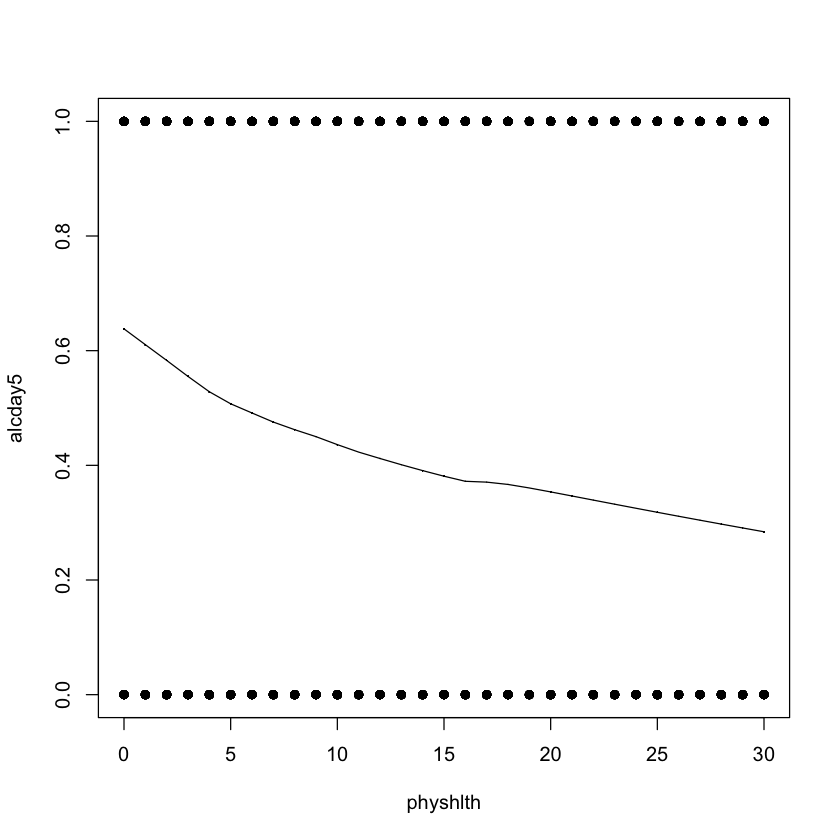

In [7]:
plot(alcday5 ~ physhlth, data=mydata, pch=16)
lines(lowess(mydata$physhlth, mydata$alcday5))

**Observation:** The plot aligns with the prediction that the higher the number of days that individuals do not feel well, the less likely they are to consume at least 1 alcoholic drink.

### 2. Mental health

**Prediction:** The higher the number of days that an individual's mental health is not good, the less likely they are to consume alcohol. 

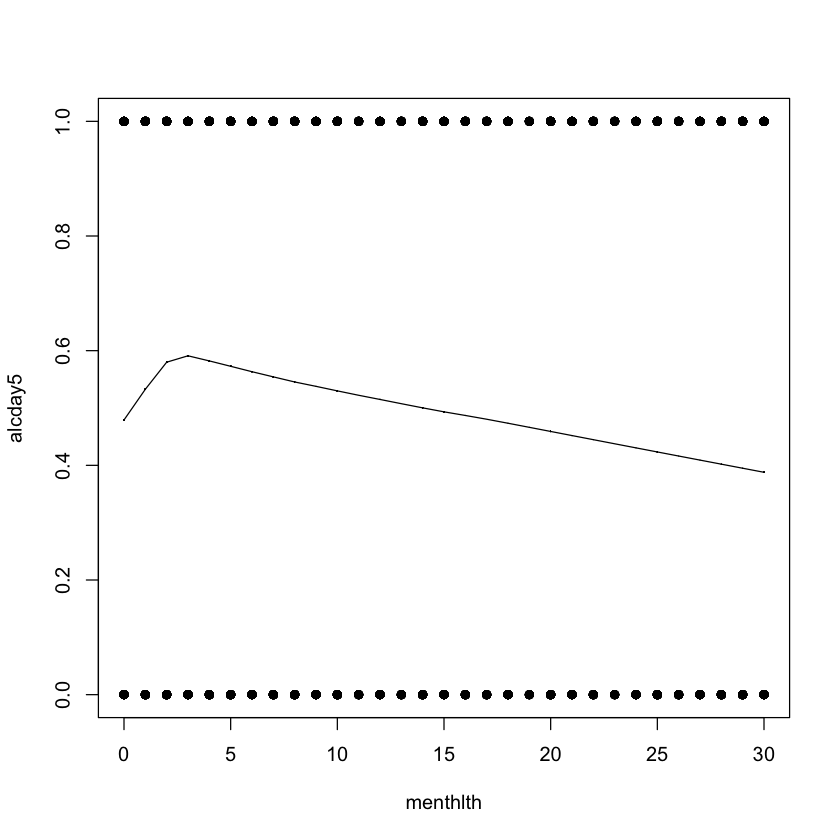

In [8]:
plot(alcday5 ~ menthlth, data=mydata, pch=16)
lines(lowess(mydata$menthlth, mydata$alcday5))

**Observation:** The plot shows that alcoholic consumption goes up for a short period of time (less than 5 days) when one's mental health is not good, but then goes down afterwards. 

### 3. Poor health

**Prediction:** The higher the number of days that an individual's poor physical or mental health keep them from doing their usual activities, the less likely they are to consume alcohol. 

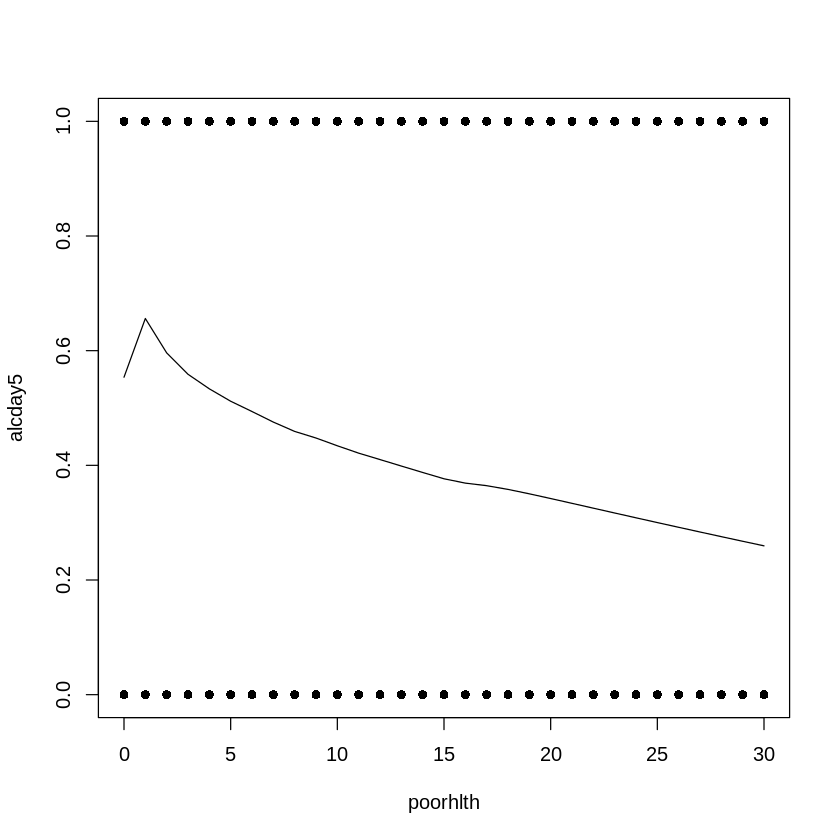

In [9]:
plot(alcday5 ~ poorhlth, data=mydata, pch=16)
lines(lowess(mydata$poorhlth, mydata$alcday5))

**Observation:** The plot shows that alcoholic consumption goes up for a short period of time (less than 5 days) when one's health prevents them from doing their usual activities, but then goes down afterwards. 

### 4. Average amount of sleep

**Prediction:** The lower the number of days that an individual sleeps, the less likely they are to consume alcohol. 

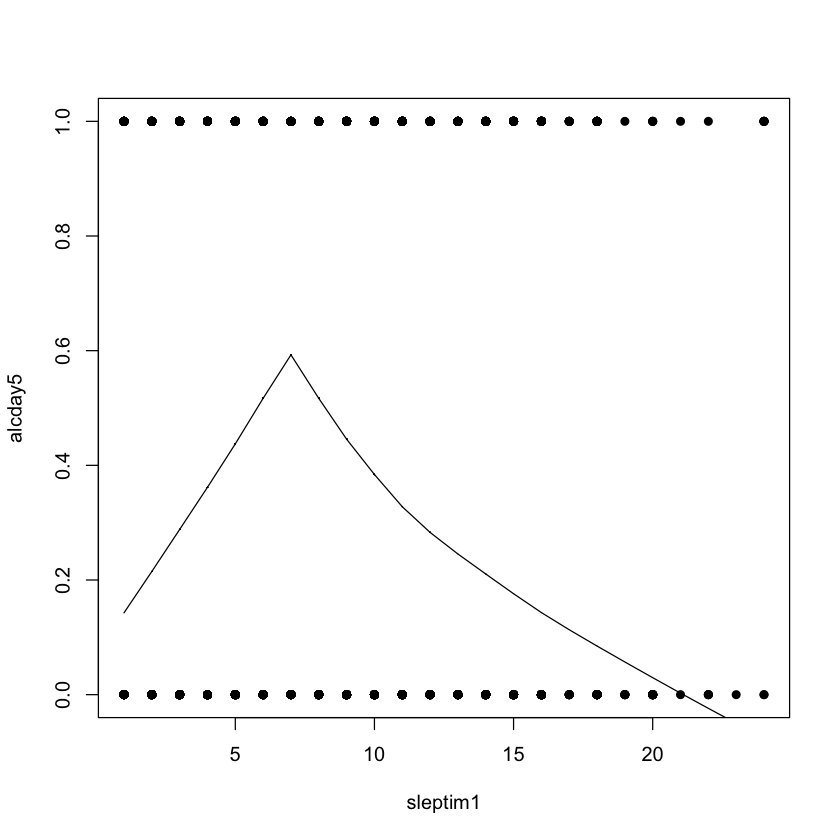

In [9]:
plot(alcday5 ~ sleptim1, data=mydata, pch=16)
lines(lowess(mydata$sleptim1, mydata$alcday5))

**Observation:** The plot shows a positive relationship between alcoholic consumption and average amount of sleep initially. However, when the average amount of sleep reaches to approximately 7, the alcoholic consumption goes down. 

### 5. Marital status

**Prediction:** People who are single are more likely to consume alcohol than people who are married or have been married before. 

In [10]:
table_marital_alcday5 <- table(mydata$marital, mydata$alcday5);
prop_marital_alcday5 <- prop.table(table_marital_alcday5, margin = 1)
prop_marital_alcday5

                                 
                                          0         1
  Married                         0.4627712 0.5372288
  Divorced                        0.5309396 0.4690604
  Widowed                         0.6620678 0.3379322
  Separated                       0.5494113 0.4505887
  Never married                   0.4400330 0.5599670
  A member of an unmarried couple 0.3584965 0.6415035

**Observation:** The result shows that there is a big difference between the group that are windowed versus the group that are a member of an unmarried couple. However, the proportion of individuals that have never married is relatively close to the proportion of individuals that are married. The proportion of individuals that are divorced is relatively close to the proportion of individuals that are separated. 

### 6. Education

**Prediction:** The higher education one achieves, the less likely they are to consume alcohol. 

In [11]:
table_educa_alcday5 <- table(mydata$educa, mydata$alcday5)
prop_educa_alcday5 <- prop.table(table_educa_alcday5, margin = 1)
prop_educa_alcday5

                                                              
                                                                       0
  Never attended school or only kindergarten                   0.7472527
  Grades 1 through 8 (Elementary)                              0.7703075
  Grades 9 though 11 (Some high school)                        0.6932373
  Grade 12 or GED (High school graduate)                       0.5868326
  College 1 year to 3 years (Some college or technical school) 0.4934173
  College 4 years or more (College graduate)                   0.3623729
                                                              
                                                                       1
  Never attended school or only kindergarten                   0.2527473
  Grades 1 through 8 (Elementary)                              0.2296925
  Grades 9 though 11 (Some high school)                        0.3067627
  Grade 12 or GED (High school graduate)                       0.413167

**Observation:** The result shows that the higher education one achieves, more likely they are to consume alcohol. If we look at the group that have consumed alcohol in the last 30 days, we can see that proportion of individuals that consume alcohol increases along with their education. If we look at the group that have not consumed alcohol in the last 30 days, those that never attended school or only kindergarten have the highest proportion while those that have college 4 years or more have the lowest proportion. There is a significant difference in the proportion among the groups. 

### 7. Income

**Prediction:** The higher income one achieves, the less likely they are to consume alcohol. 

In [12]:
table_income2_alcday5 <- table(mydata$income2, mydata$alcday5)
prop_income2_alcday5 <- prop.table(table_income2_alcday5, margin = 1)
prop_income2_alcday5

                   
                            0         1
  Less than $10,000 0.6808511 0.3191489
  Less than $15,000 0.6918387 0.3081613
  Less than $20,000 0.6447040 0.3552960
  Less than $25,000 0.5952381 0.4047619
  Less than $35,000 0.5456303 0.4543697
  Less than $50,000 0.4761494 0.5238506
  Less than $75,000 0.4112657 0.5887343
  $75,000 or more   0.2986802 0.7013198

**Observation:** The result shows that the higher income one achieves, the more likely they are to consume alcohol. There is a signficant difference between the group that make less than 10k vs the group that make 75k or more. 

### 8. Sex/gender

**Prediction:** Males are more likely to consume alcohol than females. 

In [13]:
table_sex_alcday5 <- table(mydata$sex, mydata$alcday5)
prop_sex_alcday5 <- prop.table(table_sex_alcday5, margin = 1)
prop_sex_alcday5

        
                 0         1
  Male   0.4161938 0.5838062
  Female 0.5387398 0.4612602

**Observation:** This shows that males are more likely to consume alcohol than females. However, the difference is not so significant between two groups. 

<div class="alert alert-block alert-success">
<a id="Logistic"></a>

# Building a Logistic Regression Model
    
</div>    

### Fit the final model

**Brief description of why this model is appropriate for the data:**  

The model `final.logi` is a logistic regression model that uses the explanatory variables `income2`, `sex`, `educa`, and `physhlth` to predict the binary response variable `alcday5`. Because the response variable only takes on two possible values (0 = failure, 1 = success), the binomial family is used for the error term. The logit link function is also applied to do a transformation of the y variable so that the predictions that we generate are no longer constrained between 0 and 1.

In [16]:
final.logi <- glm(alcday5 ~ income2 + sex + educa + physhlth, data=mydata, family="binomial"(link="logit"))
summary(final.logi) 


Call:
glm(formula = alcday5 ~ income2 + sex + educa + physhlth, family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8205  -1.0617   0.6505   1.0377   2.1385  

Coefficients:
                                                                    Estimate
(Intercept)                                                       -0.6736447
income2Less than $15,000                                          -0.0875593
income2Less than $20,000                                           0.0437178
income2Less than $25,000                                           0.1743621
income2Less than $35,000                                           0.2936610
income2Less than $50,000                                           0.4694416
income2Less than $75,000                                           0.6452160
income2$75,000 or more                                             1.0380286
sexFemale                                                 

### Equation of the model

\begin{equation*}
log(\frac{p}{1-p})\ = -0.6736447 - 0.0875593 income2Less than $15,000 + 0.0437178 income2Less than $20,000 + 0.1743621 income2Less than $25,000 + 0.2936610 income2Less than $35,000 + 0.4694416 income2Less than $50,000 + 0.6452160 income2Less than $75,000 + 1.0380286 income2$75,000 or more - 0.5080665 sexFemale + 0.0200205 educaGrades 1 through 8 (Elementary) + 0.3405748 educaGrades 9 though 11 (Some high school) + 0.5944383 educaGrade 12 or GED (High school graduate) + 0.8560208 educaCollege 1 year to 3 years (Some college or technical school) + 1.0810910 educaCollege 4 years or more (College graduate) - 0.0310090 physhlth
\end{equation*} 

**Categorical variable 1:** `income2`  
The category level `Less than $10,000` is encoded as 0 and acts as the reference category level for the remaining category levels of the `income2` variable.


**Categorical variable 2:** `sex`  
The category level `Male` is encoded as 0 and acts as the reference category level for the remaining category level of the `sex` variable.


**Categorical variable 3:** `educa`  
The category level `Never attended school or only kindergarten` is encoded as 0 and acts as the reference category level for the remaining category levels of the `educa` variable.

### Create plots to visualize the model fit

In [140]:
income2 <- c('Less than $10,000', 'Less than $15,000', 'Less than $20,000', 'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 'Less than $75,000', '$75,000 or more')
sex <- c('Male', 'Female')
educa <- c('Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)', 'Grades 9 though 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)', 'College 4 years or more (College graduate)')
physhlth <- seq(min(mydata.pois$physhlth), max(mydata.pois$physhlth), length.out = 100); physhlth

[1]  0.0000000  0.3030303  0.6060606  0.9090909  1.2121212  1.5151515
  [7]  1.8181818  2.1212121  2.4242424  2.7272727  3.0303030  3.3333333
 [13]  3.6363636  3.9393939  4.2424242  4.5454545  4.8484848  5.1515152
 [19]  5.4545455  5.7575758  6.0606061  6.3636364  6.6666667  6.9696970
 [25]  7.2727273  7.5757576  7.8787879  8.1818182  8.4848485  8.7878788
 [31]  9.0909091  9.3939394  9.6969697 10.0000000 10.3030303 10.6060606
 [37] 10.9090909 11.2121212 11.5151515 11.8181818 12.1212121 12.4242424
 [43] 12.7272727 13.0303030 13.3333333 13.6363636 13.9393939 14.2424242
 [49] 14.5454545 14.8484848 15.1515152 15.4545455 15.7575758 16.0606061
 [55] 16.3636364 16.6666667 16.9696970 17.2727273 17.5757576 17.8787879
 [61] 18.1818182 18.4848485 18.7878788 19.0909091 19.3939394 19.6969697
 [67] 20.0000000 20.3030303 20.6060606 20.9090909 21.2121212 21.5151515
 [73] 21.8181818 22.1212121 22.4242424 22.7272727 23.0303030 23.3333333
 [79] 23.6363636 23.9393939 24.2424242 24.5454545 24.8484848 25.1515152
 [85] 25.4545455 25.7575758 26.0606061 26.3636364 26.6666667 26.9696970
 [91] 27.2727273 27.5757576 27.8787879 28.1818182 28.4848485 28.7878788
 [97] 29.0909091 29.3939394 29.6969697 30.0000000

In [141]:
# Create a data frame of all combinations
new.data.log <- expand.grid(income2 = income2, sex = sex, educa = educa, physhlth = physhlth); head(new.data.log)

,income2,sex,educa,physhlth
,<fct>,<fct>,<fct>,<dbl>
1,"Less than $10,000",Male,Never attended school or only kindergarten,0
2,"Less than $15,000",Male,Never attended school or only kindergarten,0
3,"Less than $20,000",Male,Never attended school or only kindergarten,0
4,"Less than $25,000",Male,Never attended school or only kindergarten,0
5,"Less than $35,000",Male,Never attended school or only kindergarten,0
6,"Less than $50,000",Male,Never attended school or only kindergarten,0


In [143]:
# Get the predicted y values using final.logi model 
ynew.log <- predict(final.logi, data.frame(new.data.log), type = "response"); ynew.log
# Bind the new data with the predicted y values
new.data.log2 <- cbind(new.data.log, ynew.log); new.data.log2

,income2,sex,educa,physhlth,ynew.log
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,"Less than $10,000",Male,Never attended school or only kindergarten,0,0.3376812
2,"Less than $15,000",Male,Never attended school or only kindergarten,0,0.3183849
3,"Less than $20,000",Male,Never attended school or only kindergarten,0,0.3475271
4,"Less than $25,000",Male,Never attended school or only kindergarten,0,0.3777093
5,"Less than $35,000",Male,Never attended school or only kindergarten,0,0.4061308
6,"Less than $50,000",Male,Never attended school or only kindergarten,0,0.4491259
7,"Less than $75,000",Male,Never attended school or only kindergarten,0,0.4928933
8,"$75,000 or more",Male,Never attended school or only kindergarten,0,0.5901012
9,"Less than $10,000",Female,Never attended school or only kindergarten,0,0.2347447


To visualize the model fit of the final logistic regression model, we will plot the relationship between the three variables, `alcday5`, `educa`, `physhlth`, while fixing the two categorical variables `income2` and `sex`.

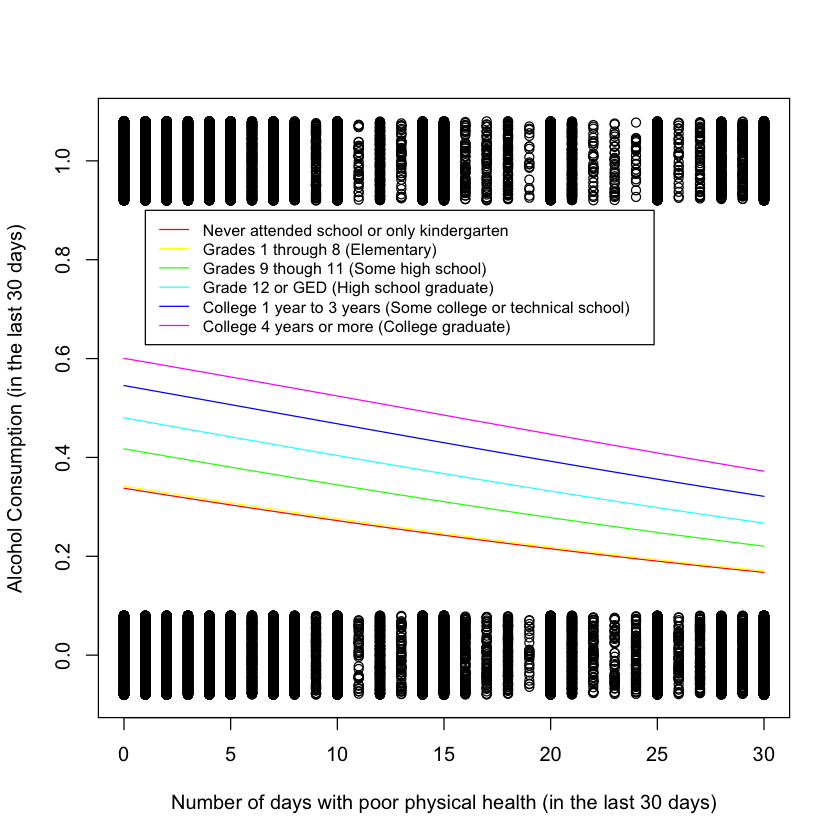

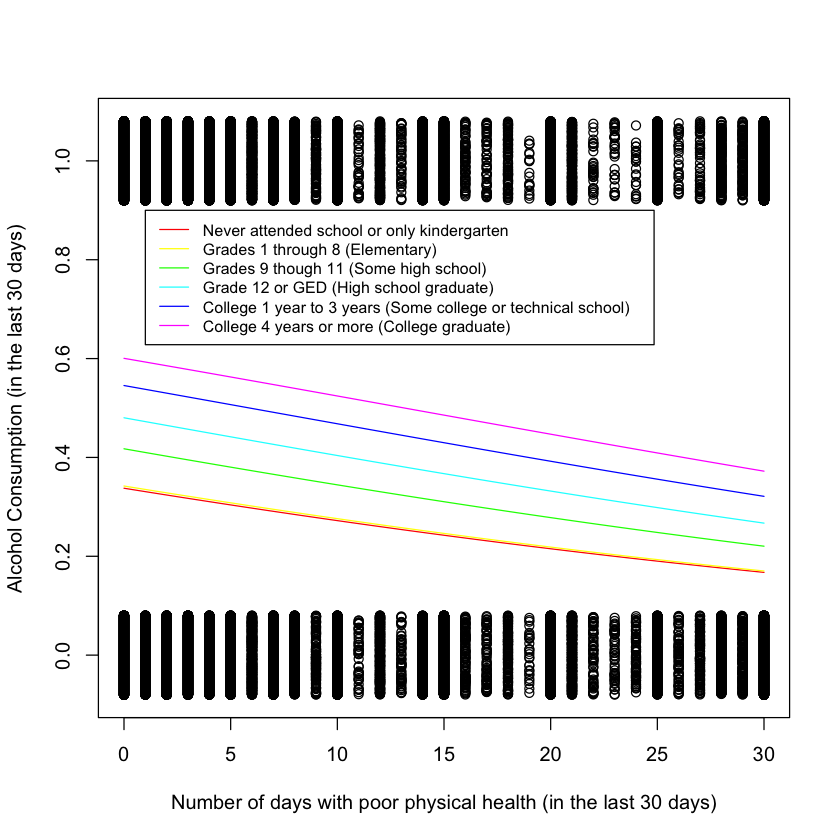

In [170]:
# Income2 = 'Less than $10,000'
for (sex in 1:2) { 
    plot(jitter(alcday5, f = 0.4) ~ physhlth, data = mydata, pch = 1, xlab = 'Number of days with poor physical health (in the last 30 days)', ylab = 'Alcohol Consumption (in the last 30 days)')
    data.log.inc.sex <- subset(new.data.log2, new.data.log2$income2 == 'Less than $10,000' & new.data.log2$sex == sex[sex])
    for (level in 1:6) {
        data.log.inc.sex.educa <- subset(data.log.inc.sex, new.data.sub$educa == educa[level])
        lines(data.log.inc.sex.educa$ynew.log ~ data.log.inc.sex.educa$physhlth, col = rainbow(6)[level])
        }
    legend(x = 1, y = .9, col = rainbow(6), lty = 1, cex = 0.8,
           legend = c('Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)', 'Grades 9 though 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)', 'College 4 years or more (College graduate)'))
}

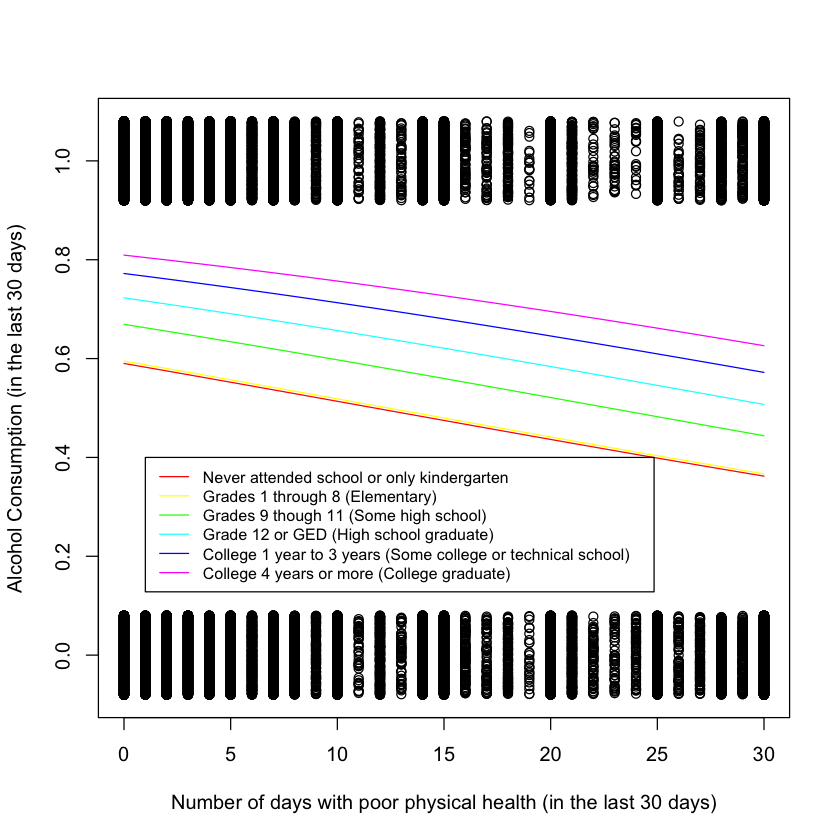

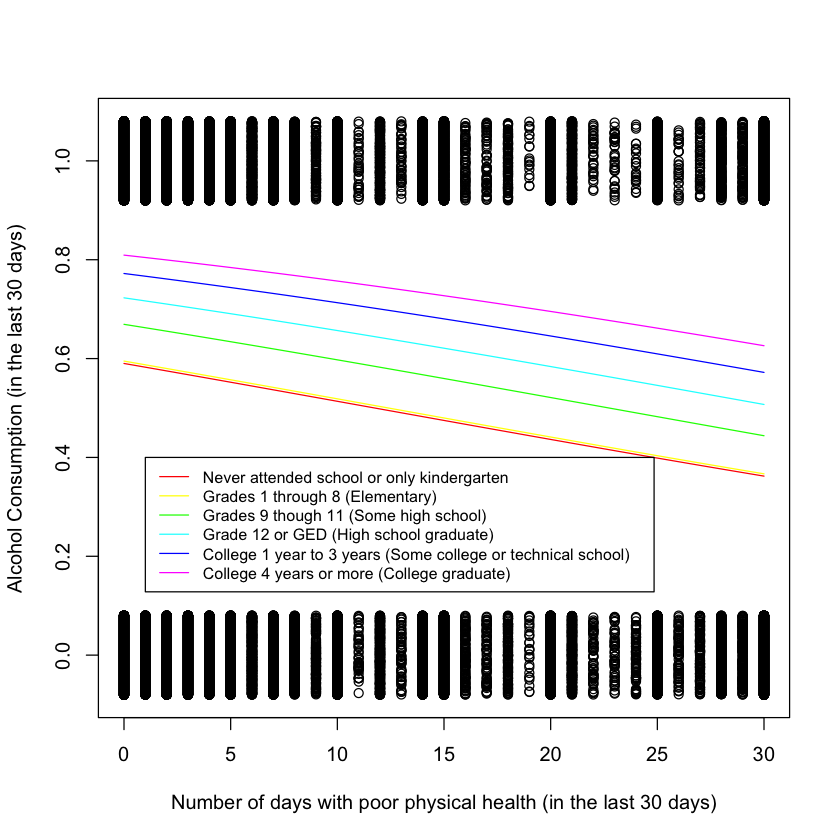

In [174]:
# Income2 = '$75,000 or more'
for (sex in 1:2) { 
    plot(jitter(alcday5, f = 0.4) ~ physhlth, data = mydata, pch = 1, xlab = 'Number of days with poor physical health (in the last 30 days)', ylab = 'Alcohol Consumption (in the last 30 days)')
    data.log.inc.sex <- subset(new.data.log2, new.data.log2$income2 == '$75,000 or more' & new.data.log2$sex == sex[sex])
    for (level in 1:6) {
        data.log.inc.sex.educa <- subset(data.log.inc.sex, new.data.sub$educa == educa[level])
        lines(data.log.inc.sex.educa$ynew.log ~ data.log.inc.sex.educa$physhlth, col = rainbow(6)[level])
        }
    legend(x = 1, y = ., col = rainbow(6), lty = 1, cex = 0.8,
           legend = c('Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)', 'Grades 9 though 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)', 'College 4 years or more (College graduate)'))
}

### Main results of the model

All the variables are statistically significant with p values < 0.05 except for educa 1 through 8 (Elementary). The AIC is 247704. However, the coefficient values of the variables are small, which indicates that there is not a big impact of those explanatory variables on the response variable.

---
## Concerns about the explanatory variables being related to each other

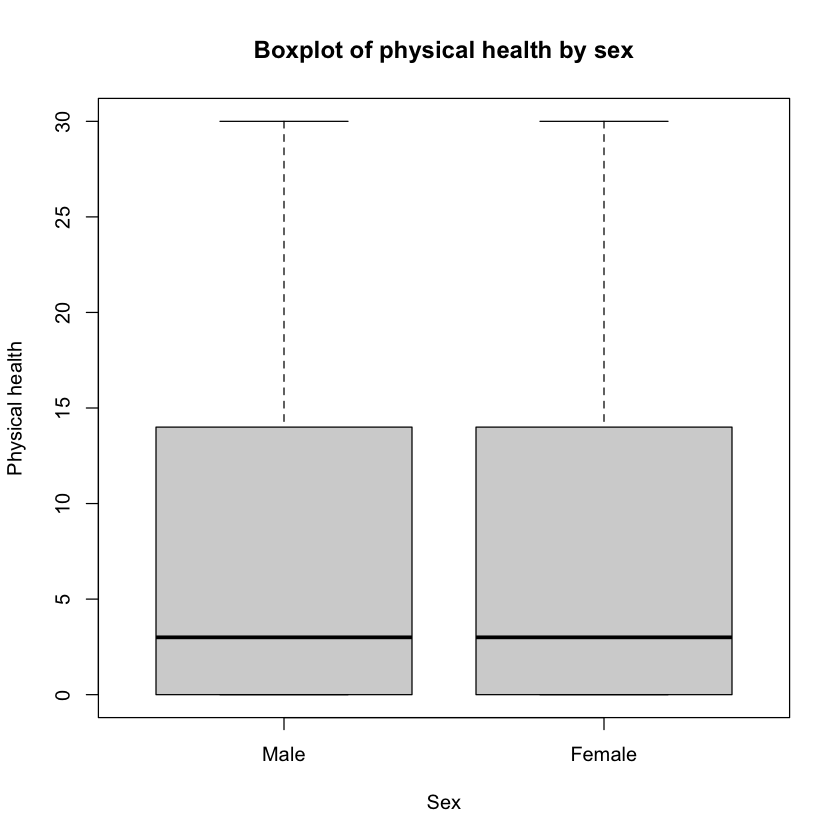

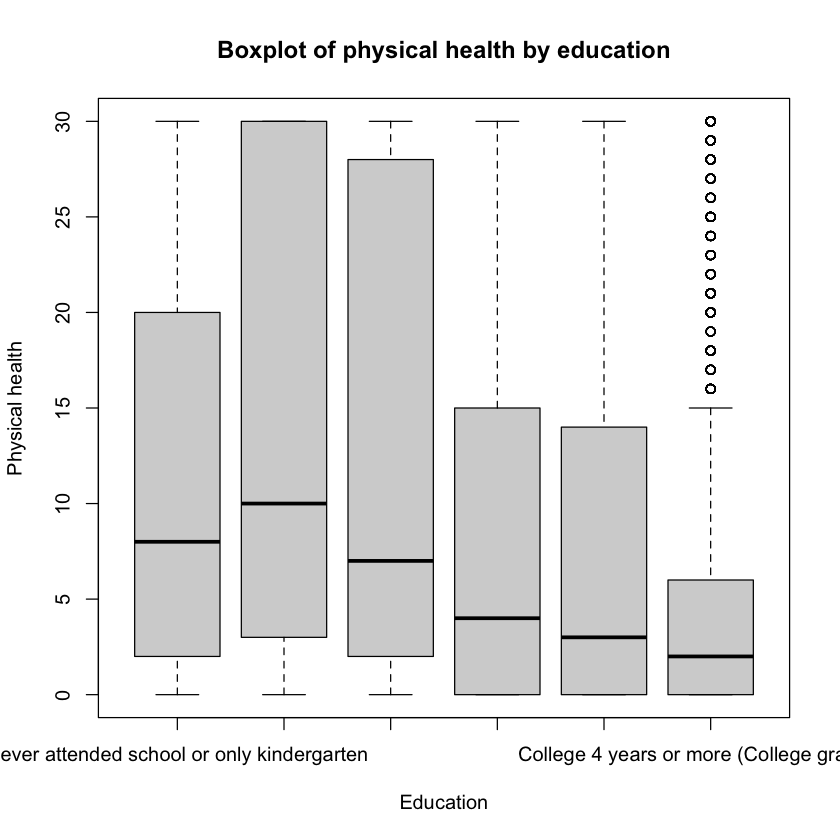

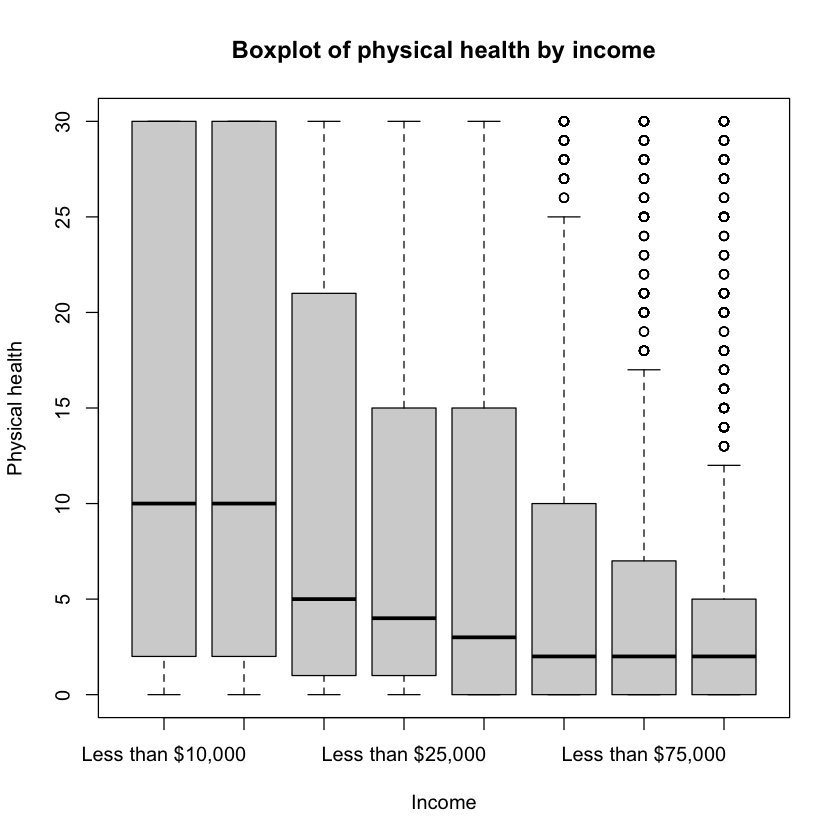

In [124]:
boxplot(physhlth ~ sex, data = mydata, xlab = "Sex", ylab = "Physical health",
        main = "Boxplot of physical health by sex")
boxplot(physhlth ~ educa, data = mydata, xlab = "Education", ylab = "Physical health",
        main = "Boxplot of physical health by education")
mydata$income2_new <- as.factor(mydata$income2) 
boxplot(physhlth ~ income2_new, data = mydata, xlab = "Income", ylab = "Physical health",
        main = "Boxplot of physical health by income")

There seems to be a correlation between physical health and education. We can see that the mean of physical health decreases as education levels increases. We also notice that there is a correlation between physical health and income level. We can see that physical health decreases as income increases. This suggests that there might be multicolinearity problem in our model. It can make it difficult to determine which predictor variable is actually responsible for the changes in the outcome variable. It can also lead to unstable and unreliable estimates of the regression coefficients, making it difficult to interpret the results of the analysis.

<div class="alert alert-block alert-info"> 
    
## Classification table
    
<div>

### Classification table

In [17]:
# Create an empty dataframe 
df <- data.frame(matrix(ncol = 9, nrow = 51))
colnames(df) <- c("true.positive", "true.negative", "false.positive", "false.negative", "correct.percent", "sensitivity", "specificity", "false.pos.rate", "false.neg.rate")
head(df)

,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [18]:
# Create a vector with different possible probabilities
prob.level <- seq(0, 1, length.out = 51); prob.level
# Combine the vector of probabilities and your empty dataframe
class.table.data <- cbind(prob.level, df) 
# The dataframe has one row for each probability cut-off
head(class.table.data) 

[1] 0.00 0.02 0.04 0.06 0.08 0.10 0.12 0.14 0.16 0.18 0.20 0.22 0.24 0.26 0.28
[16] 0.30 0.32 0.34 0.36 0.38 0.40 0.42 0.44 0.46 0.48 0.50 0.52 0.54 0.56 0.58
[31] 0.60 0.62 0.64 0.66 0.68 0.70 0.72 0.74 0.76 0.78 0.80 0.82 0.84 0.86 0.88
[46] 0.90 0.92 0.94 0.96 0.98 1.00

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,0.02,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,0.04,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,0.06,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,0.08,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,0.10,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [19]:
# Fill empty cells in the dataframe with 0
class.table.data$true.positive <- rep(c(0), c(51))
class.table.data$true.negative <- rep(c(0), c(51))
class.table.data$false.positive <- rep(c(0), c(51))
class.table.data$false.negative <- rep(c(0), c(51))
head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.00,0,0,0,0,NA,NA,NA,NA,NA
2,0.02,0,0,0,0,NA,NA,NA,NA,NA
3,0.04,0,0,0,0,NA,NA,NA,NA,NA
4,0.06,0,0,0,0,NA,NA,NA,NA,NA
5,0.08,0,0,0,0,NA,NA,NA,NA,NA
6,0.10,0,0,0,0,NA,NA,NA,NA,NA


In [20]:
# This loop will try out the different probability cut-off values and fill in how many true positive/negatives and false positive/negatives you have based on the data.
for (i in 1:51) {
class.table <- table(mydata$alcday5, fitted(z13) > class.table.data$prob.level[i])

col.true.num <- grep("TRUE", colnames(class.table))
col.false.num <- grep("FALSE", colnames(class.table))

if (length(col.true.num) > 0) {
      class.table.data$false.positive [i] <- class.table[1, col.true.num]
      class.table.data$true.positive [i] <- class.table[2, col.true.num] }

if (length(col.false.num) > 0) {
      class.table.data$true.negative [i] <- class.table[1, col.false.num]
      class.table.data$false.negative [i] <- class.table[2, col.false.num] }  }

head(class.table.data)

,prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,0.00,99809,0,96864,0,NA,NA,NA,NA,NA
2,0.02,99809,0,96864,0,NA,NA,NA,NA,NA
3,0.04,99809,0,96864,0,NA,NA,NA,NA,NA
4,0.06,99809,0,96864,0,NA,NA,NA,NA,NA
5,0.08,99809,0,96864,0,NA,NA,NA,NA,NA
6,0.10,99809,1,96863,0,NA,NA,NA,NA,NA


In [21]:
# Use this information to fill in the rest of the classification table.
class.table.data$correct.percent <- (class.table.data$true.positive + class.table.data$true.negative)/nrow(mydata)*100
class.table.data$sensitivity <- (class.table.data$true.positive)/sum(mydata$alcday5)*100
class.table.data$specificity <- (class.table.data$true.negative)/(nrow(mydata) - sum(mydata$alcday5))*100
class.table.data$false.neg.rate <- (class.table.data$false.negative)/sum(mydata$alcday5)*100
class.table.data$false.pos.rate <- (class.table.data$false.positive)/(nrow(mydata) - sum(mydata$alcday5))*100
class.table.data

prob.level,true.positive,true.negative,false.positive,false.negative,correct.percent,sensitivity,specificity,false.pos.rate,false.neg.rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,99809,0,96864,0,50.74870,100.000000,0.000000e+00,100.000000,0.00000000
0.02,99809,0,96864,0,50.74870,100.000000,0.000000e+00,100.000000,0.00000000
0.04,99809,0,96864,0,50.74870,100.000000,0.000000e+00,100.000000,0.00000000
0.06,99809,0,96864,0,50.74870,100.000000,0.000000e+00,100.000000,0.00000000
0.08,99809,0,96864,0,50.74870,100.000000,0.000000e+00,100.000000,0.00000000
0.10,99809,1,96863,0,50.74921,100.000000,1.032375e-03,99.998968,0.00000000
0.12,99742,578,96286,67,51.00853,99.932872,5.967129e-01,99.403287,0.06712821
0.14,99673,1044,95820,136,51.21038,99.863740,1.077800e+00,98.922200,0.13626026
0.16,99503,2119,94745,306,51.67054,99.693414,2.187603e+00,97.812397,0.30658558


### Optimal probability cut-off that maximizes the accuracy of the model

In [32]:
# Create a column of the accuracy of the model
class.table.data$accuracy <- (class.table.data$true.positive + class.table.data$true.negative)/(class.table.data$true.positive + class.table.data$true.negative + class.table.data$false.positive + class.table.data$false.negative)
# Maximum accuracy of the model
max(class.table.data$accuracy) # 0.647618127551825
# The probability cut-off that maximizes the accuracy of the model
class.table.data[which.max(class.table.data$accuracy),]$prob.level # 0.5

[1] 0.6476181

[1] 0.5

**Answer:** The optimal cut-off that gives the maximum accuracy of the model is 0.5

<div class="alert alert-block alert-info"> 
    
## ROC curve + AUC 
    
<div>

### Create the ROC curve

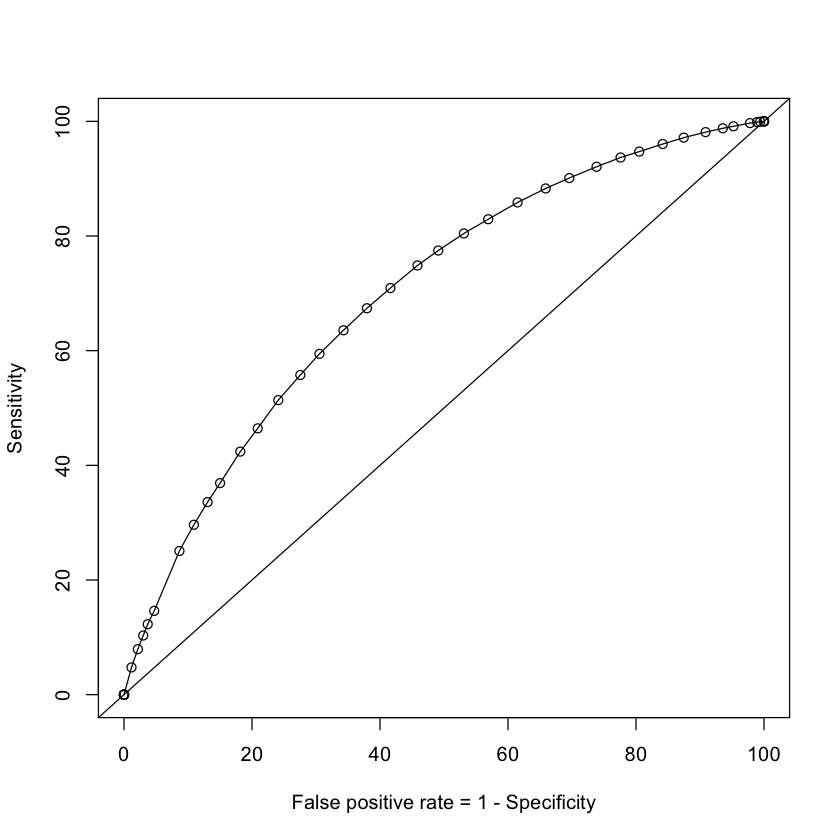

In [33]:
plot(class.table.data$sensitivity ~ class.table.data$false.pos.rate, data=class.table.data, ylab = "Sensitivity", xlab = "False positive rate = 1 - Specificity")
lines(sensitivity ~ false.pos.rate, data=class.table.data)
abline(0, 1)

### Find the AUC (area under the curve) value

In [34]:
library(zoo)

x <- class.table.data$false.pos.rate/100
y <- class.table.data$sensitivity/100
id <- order(x)

AUC <- sum(diff(x[id])*rollmean(y[id],2)); AUC


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] 0.6997014

### Interpretation of the results

The ROC curve shows a good-enough classifier with the ROC curve closer to the axes but the “elbow” still a bit far from the coordinate (0,1). The AUC value of 0.699701425800252 implies that the classifier performs better than random guessing, but it is not flawless. It indicates that the classifier has the capability to differentiate between positive and negative instances to some extent, but there is still a scope for enhancing its performance.

<div class="alert alert-block alert-danger">
<a id="Data_prep2"></a>

# Data preparation for Poisson regression
</div>

In [37]:
mydata.pois <- subset(mydata, alcday5 != 0); 
str(mydata.pois)

'data.frame':	99809 obs. of  10 variables:
 $ physhlth: int  3 2 10 5 0 3 3 4 0 23 ...
 $ menthlth: int  2 0 2 0 1 3 2 0 5 30 ...
 $ poorhlth: int  0 0 0 10 0 0 0 0 0 30 ...
 $ sleptim1: int  9 8 6 6 6 6 6 7 8 4 ...
 $ marital : Factor w/ 6 levels "Married","Divorced",..: 1 1 1 3 1 1 1 1 1 2 ...
 $ educa   : Factor w/ 6 levels "Never attended school or only kindergarten",..: 6 4 6 5 6 4 5 5 6 4 ...
 $ income2 : Factor w/ 8 levels "Less than $10,000",..: 8 7 6 6 8 8 7 4 8 1 ...
 $ sex     : Factor w/ 2 levels "Male","Female": 2 2 1 2 1 2 1 1 2 2 ...
 $ alcday5 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ drnk3ge5: num  20 0 0 0 0 0 0 0 0 0 ...


**Answer**: There are 99809 observations in the new dataset.

<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Exploring the response variable
    
The focus of this analysis is to examine variables associated with consuming more than the recommended maximum of alcohol. The focus is only on individuals who have consumed at least one alcohol drink in the past 30 days (this helps remove excess 0's). The variable `drnk3ge5` will be used as the response variable.  

</div>

## Visualization Assessment

### Visualization of the response variable

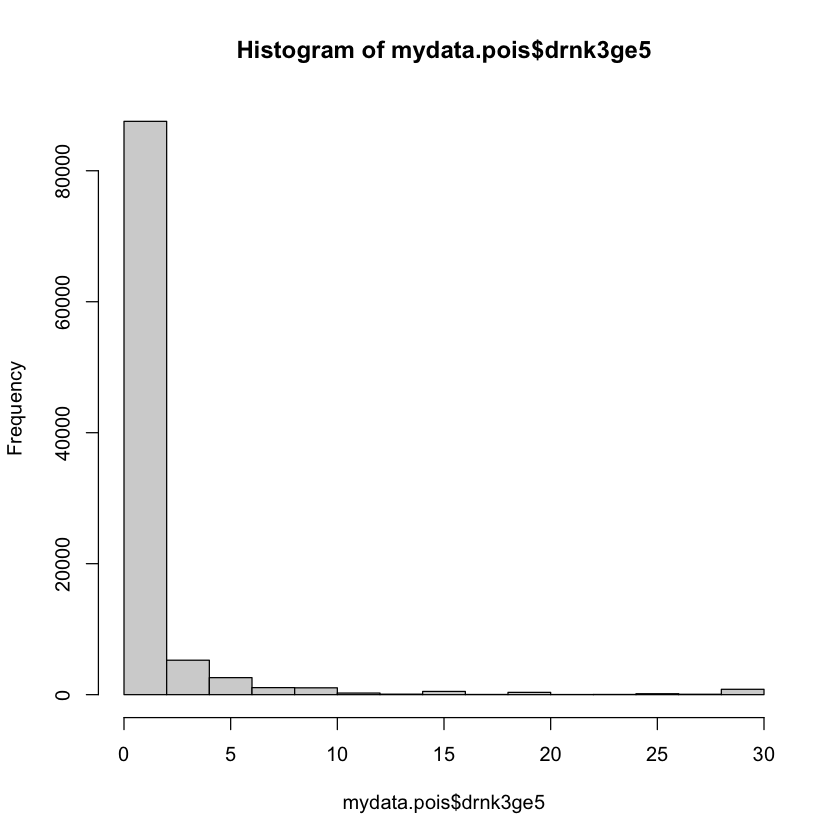

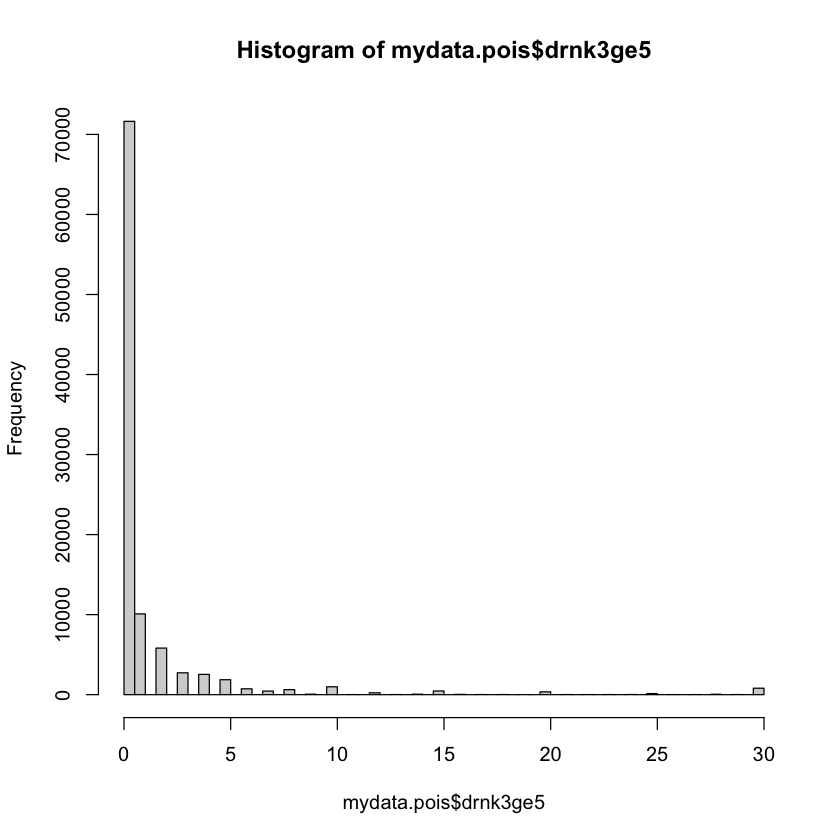

In [38]:
hist(mydata.pois$drnk3ge5)
hist(mydata.pois$drnk3ge5, breaks = seq(0, 30, by = 0.5))

**Observation:**  
The histogram of the variable `drnk3ge5` shows a discrete, right-skewed distribution with no negative values. However, the presence of a large number of 0 values and only a few very large values suggests the mean of the distribution may be smaller than its variance, meaning that the `drnk3ge5` might not follow the Poisson distribution.

### Visualization of the Poisson data simulation

In [39]:
# Mean of `drnk3ge5` variable
mean.drnk3ge5 <- mean(mydata.pois$drnk3ge5); mean.drnk3ge5 # 1.2276247632979
# Sample size
n.pois <- nrow(mydata.pois); n.pois # 99809

[1] 1.227625

[1] 99809

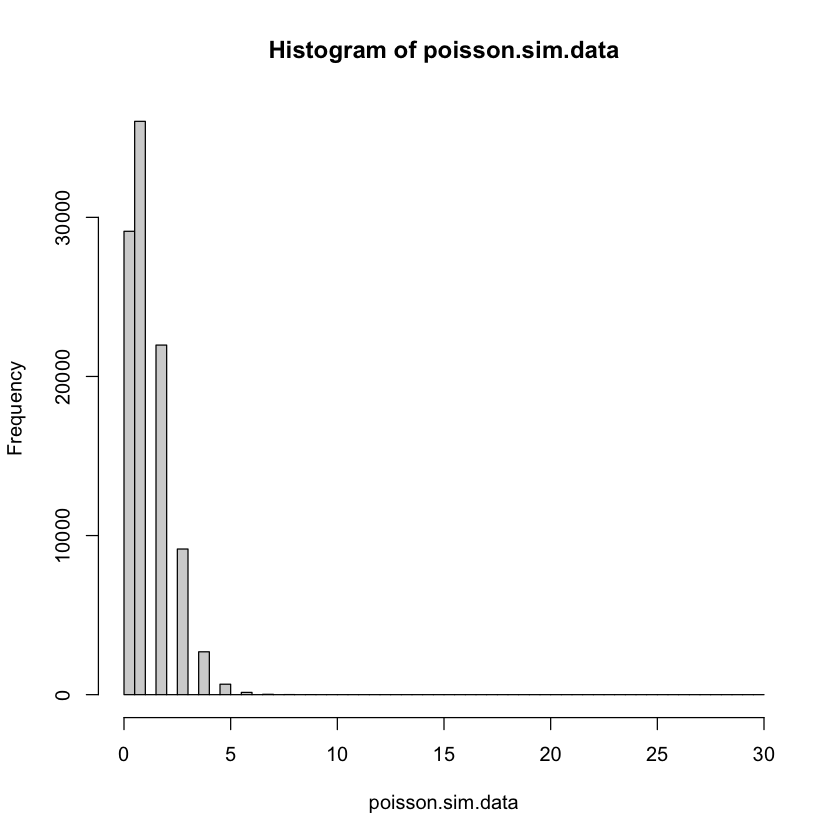

In [40]:
poisson.sim.data <- rpois(n.pois, mean.drnk3ge5)
hist(poisson.sim.data, breaks = seq(0, 30, by = 0.5))

**Observations:**  
Upon examining the histogram of the data with the Poisson distribution, it is noticeable that the highest value is much less than 30, and the distribution is unimodal with a fewer number of 0s compared to the histogram of the actual response variable. 

### Conclusion:

Based on the visualization assessment, it seems unlikely that the response variable `drnk3ge5` follows a Poisson distribution. In the next step, a statistical test will be conducted to confirm this observation.

## Goodness-of-fit for Poisson distribution

### Frequencies of actual data

In [41]:
table(mydata.pois$drnk3ge5)
# Frequency of value 19 is less than 5


    0     1     2     3     4     5     6     7     8     9    10    11    12 
71635 10093  5819  2729  2533  1868   731   447   628    61   984    11   235 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   17    58   459    36    15    16     1   351    14     9    13    20   135 
   26    27    28    29    30 
    9    10    51    15   806 

In [42]:
frequency.table <- as.data.frame(table(mydata.pois$drnk3ge5)); frequency.table

Var1,Freq
<fct>,<int>
0,71635
1,10093
2,5819
3,2729
4,2533
5,1868
6,731
7,447
8,628


In [43]:
# Group the actual frequencies of value 18 and 19 
sum(frequency.table$Freq[19:20])
frequency.table$Freq[19] <- c(sum(frequency.table$Freq[19:20])); frequency.table

[1] 17

Var1,Freq
<fct>,<int>
0,71635
1,10093
2,5819
3,2729
4,2533
5,1868
6,731
7,447
8,628


In [44]:
frequency.table.new <- subset(frequency.table, Var1 != 19); frequency.table.new

,Var1,Freq
,<fct>,<int>
1,0,71635
2,1,10093
3,2,5819
4,3,2729
5,4,2533
6,5,1868
7,6,731
8,7,447
9,8,628


### Expected frequencies 

In [45]:
expected.freq <- vector("numeric")

# Get the expected frequencies of the values that have frequency larger than 5
for (i in 1:31) {
    expected.freq[i] <- (exp(-mean.drnk3ge5)*mean.drnk3ge5^(i-1)/factorial(i-1)) * n.pois
}
expected.freq

[1] 2.924281e+04 3.589919e+04 2.203537e+04 9.017055e+03 2.767390e+03
 [6] 6.794633e+02 1.390210e+02 2.438080e+01 3.741310e+00 5.103249e-01
[11] 6.264875e-02 6.991742e-03 7.152696e-04 6.754482e-05 5.922835e-06
[16] 4.847346e-07 3.719201e-08 2.685755e-09 1.831722e-10 1.183509e-11
[21] 7.264525e-13 4.246720e-14 2.369717e-15 1.264836e-16 6.469769e-18
[26] 3.176979e-19 1.500053e-20 6.820380e-22 2.990310e-23 1.265855e-24
[31] 5.179981e-26

In [46]:
sum(expected.freq[19:20])

[1] 1.950073e-10

In [47]:
# Group expected frequencies of value 18-19 
expected.freq[19] <- c(sum(expected.freq[19:20])); expected.freq

[1] 2.924281e+04 3.589919e+04 2.203537e+04 9.017055e+03 2.767390e+03
 [6] 6.794633e+02 1.390210e+02 2.438080e+01 3.741310e+00 5.103249e-01
[11] 6.264875e-02 6.991742e-03 7.152696e-04 6.754482e-05 5.922835e-06
[16] 4.847346e-07 3.719201e-08 2.685755e-09 1.950073e-10 1.183509e-11
[21] 7.264525e-13 4.246720e-14 2.369717e-15 1.264836e-16 6.469769e-18
[26] 3.176979e-19 1.500053e-20 6.820380e-22 2.990310e-23 1.265855e-24
[31] 5.179981e-26

In [48]:
expected.freq <- expected.freq[-20]; expected.freq

[1] 2.924281e+04 3.589919e+04 2.203537e+04 9.017055e+03 2.767390e+03
 [6] 6.794633e+02 1.390210e+02 2.438080e+01 3.741310e+00 5.103249e-01
[11] 6.264875e-02 6.991742e-03 7.152696e-04 6.754482e-05 5.922835e-06
[16] 4.847346e-07 3.719201e-08 2.685755e-09 1.950073e-10 7.264525e-13
[21] 4.246720e-14 2.369717e-15 1.264836e-16 6.469769e-18 3.176979e-19
[26] 1.500053e-20 6.820380e-22 2.990310e-23 1.265855e-24 5.179981e-26

### Create a frequency table consisting of both observed values and expected values

In [49]:
freq.table <- cbind(frequency.table.new, expected.freq); freq.table

,Var1,Freq,expected.freq
,<fct>,<int>,<dbl>
1,0,71635,2.924281e+04
2,1,10093,3.589919e+04
3,2,5819,2.203537e+04
4,3,2729,9.017055e+03
5,4,2533,2.767390e+03
6,5,1868,6.794633e+02
7,6,731,1.390210e+02
8,7,447,2.438080e+01
9,8,628,3.741310e+00


### Chi-Square goodness of fit test

H0: Response variable follows a Poisson distribution.    
HA: Response variable does not follow a Poisson distribution.

In [50]:
chisq.test(freq.table$Freq, p=freq.table$expected.freq/n.pois)

Warning message in chisq.test(freq.table$Freq, p = freq.table$expected.freq/n.pois):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  freq.table$Freq
X-squared = 1.2542e+31, df = 29, p-value < 2.2e-16


**Conclusion:**

As P-value < alpha (0.05), we reject the null hypothesis. **The response variable `drnk3ge5` does not follow the Poisson distribution.**

<div class="alert alert-block alert-warning">
<a id="EDA2"></a>

# Predictions and Exploratory Data Analysis for Poisson Regression (8 marks; 1 mark per variable)

</div>

### 1. Physical health

**Prediction: A negative relationship**   
As the number of days an individual's physical health was not good increases, they may consume such high quantities of alcoholic drinks less frequently over the course of 30 days.

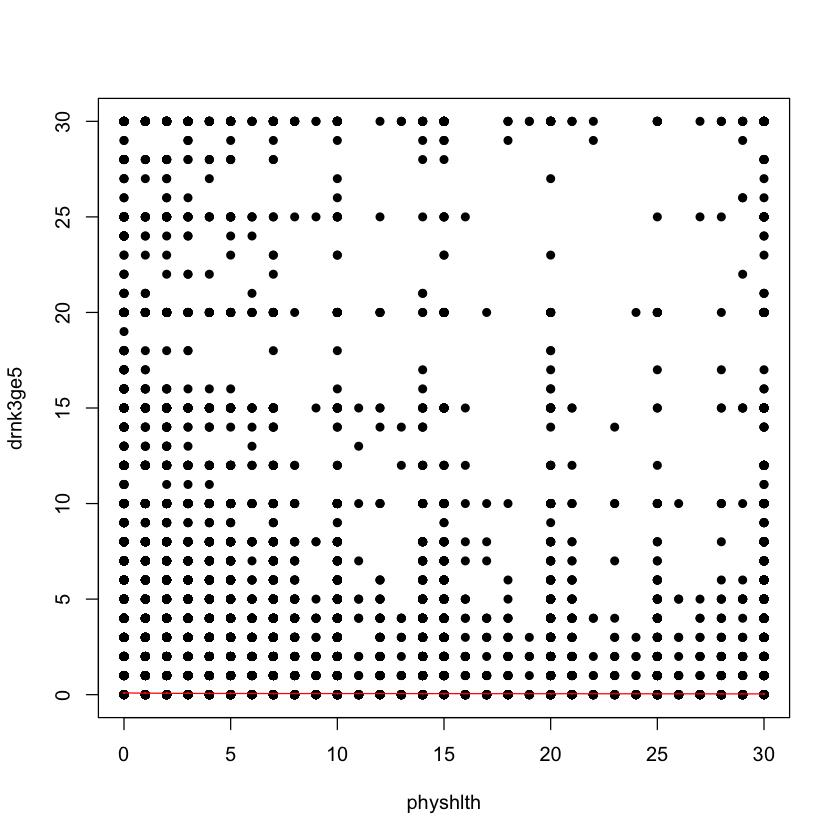

In [51]:
plot(drnk3ge5 ~ physhlth, data = mydata.pois, pch = 16) 
lines(lowess(mydata.pois$physhlth, mydata.pois$drnk3ge5), col = "red")

**Observation:** The plot does not show any relationship between `drnk3ge5` and `physhlth`.

### 2. Mental health

**Prediction: A positive relationship**   
As the number of days with poor mental health increases, the number of times a person has 5 or more drinks for men or 4 or more drinks for women on an occasion may also increase. This can be due to the fact that many people using drinking to exacerbate the feelings of sadness, depression, or low mood. 

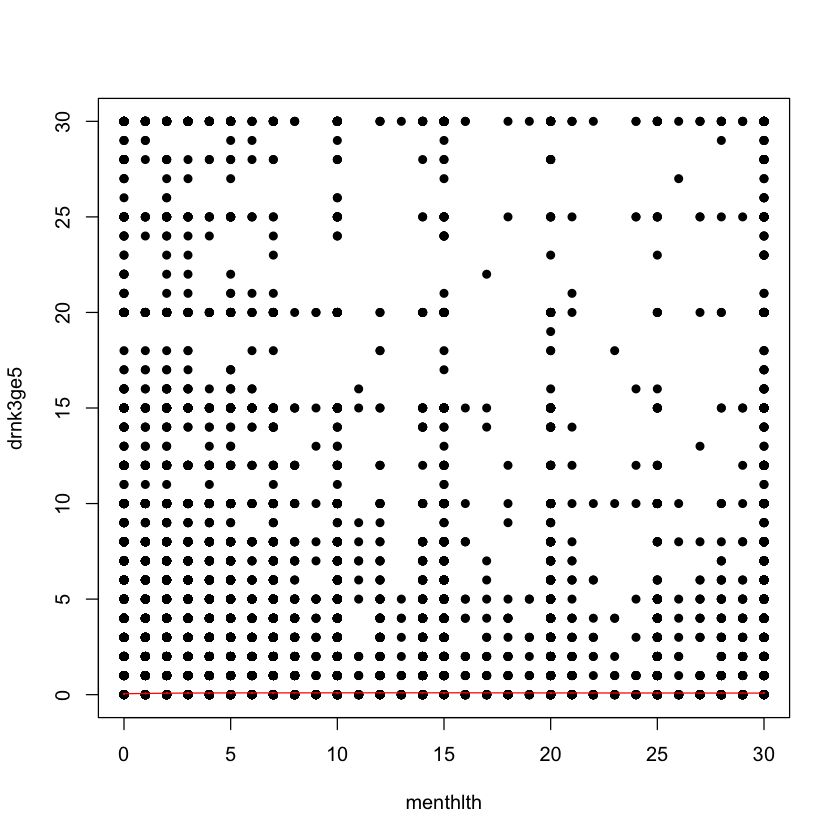

In [52]:
plot(drnk3ge5 ~ menthlth, data = mydata.pois, pch = 16) 
lines(lowess(mydata.pois$menthlth, mydata.pois$drnk3ge5), col = "red")

**Observation:** The plot does not show any relationship between `drnk3ge5` and `menthlth`.

### 3. Poor health

**Prediction: A positive relationship**   
As the number of days with poor health increases, the number of times a person has 5 or more drinks for men or 4 or more drinks for women on an occasion may also increase. This may be because some individuals use alcohol to cope with negative emotions like sadness, depression, or low mood, and as the number of days with poor health increases, so does the likelihood of experiencing these negative emotions. Additionally, individuals with poor health may have fewer opportunities for physical or social activities, and may turn to drinking as a form of recreation or to pass the time. 

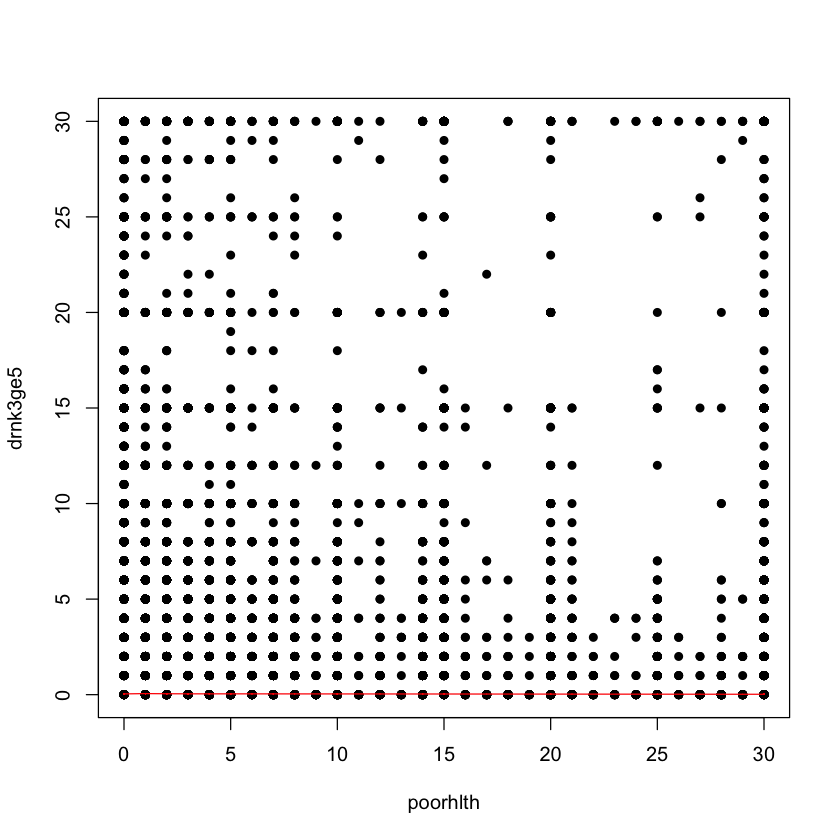

In [53]:
plot(drnk3ge5 ~ poorhlth, data = mydata.pois, pch = 16) 
lines(lowess(mydata.pois$poorhlth, mydata.pois$drnk3ge5), col = "red")

**Observation:** The plot does not show any relationship between `drnk3ge5` and `poorhlth`.

### 4. Average amount of sleep

**Prediction: A positive relationship**   
As the number of days with poor health increases, the number of times a person has 5 or more drinks for men or 4 or more drinks for women on an occasion may also increase. This may be because some individuals use alcohol to cope with negative emotions like sadness, depression, or low mood, and as the number of days with poor health increases, so does the likelihood of experiencing these negative emotions. Additionally, individuals with poor health may have fewer opportunities for physical or social activities, and may turn to drinking as a form of recreation or to pass the time. 

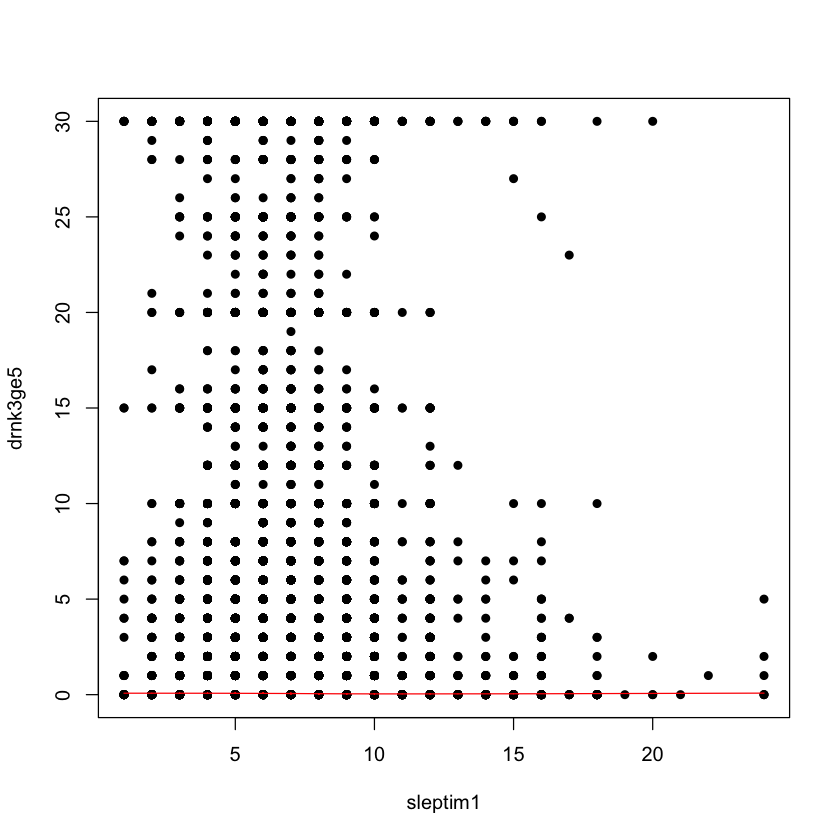

In [54]:
plot(drnk3ge5 ~ sleptim1, data = mydata.pois, pch = 16) 
lines(lowess(mydata.pois$sleptim1, mydata.pois$drnk3ge5), col = "red")

**Observation:** The plot does not show any relationship between `drnk3ge5` and `sleptim1`.

### 5. Marital status

**Prediction:**  
The frequency of excessive alcohol consumption might vary across different categories of marital status.

In [63]:
marital.mean <- as.data.frame(tapply(mydata.pois$drnk3ge5, mydata.pois$marital, FUN = mean))
colnames(marital.mean) <- c("Mean of the response variable"); marital.mean

,Mean of the response variable
,<dbl>
Married,0.9022971
Divorced,1.5140076
Widowed,0.7790698
Separated,1.7121932
Never married,1.9256635
A member of an unmarried couple,1.7077637


**Observation:** There are differences in the means of the response variable `drnk3ge5` for different category levels of `marital` variable. This indicates that `marital` variable could be a good explanatory variable to use.

### 6. Education

**Prediction:**   
The frequency of excessive alcohol consumption might vary across different levels of education. Higher levels of education are likely to be associated with less frequent and excessive alcohol consumption, while lower levels of education might be associated with more frequent and excessive alcohol consumption. 

In [65]:
edu.mean <- as.data.frame(tapply(mydata.pois$drnk3ge5, mydata.pois$educa, FUN = mean))
colnames(edu.mean) <- c("Mean of the response variable"); edu.mean

,Mean of the response variable
,<dbl>
Never attended school or only kindergarten,1.5217391
Grades 1 through 8 (Elementary),2.1191136
Grades 9 though 11 (Some high school),2.2215703
Grade 12 or GED (High school graduate),1.6635614
College 1 year to 3 years (Some college or technical school),1.3079658
College 4 years or more (College graduate),0.8446713


**Observation:** There are differences in the means of the response variable `drnk3ge5` for different category levels of `educa` variable. This indicates that `educa` variable could be a good explanatory variable to use.

### 7. Income

**Prediction:**   
Individuals with lower incomes may have a higher likelihood of consuming 5 or more drinks for men or 4 or more drinks for women on an occasion due to material stressors associated with financial difficulties. As a result, they may turn to alcohol as a means of coping with the stress or strain associated with their circumstances.

In [66]:
income.mean <- as.data.frame(tapply(mydata.pois$drnk3ge5, mydata.pois$income2, FUN = mean))
colnames(income.mean) <- c("Mean of the response variable"); income.mean

,Mean of the response variable
,<dbl>
"Less than $10,000",2.1182390
"Less than $15,000",1.7915337
"Less than $20,000",1.5696377
"Less than $25,000",1.4183794
"Less than $35,000",1.3427135
"Less than $50,000",1.2270296
"Less than $75,000",1.0742664
"$75,000 or more",0.9479333


**Observation:** Based on the table above, there are differences in the means of the response variable `drnk3ge5` for different category levels of `income2` variable. The mean values show that as the income level increases, the mean value of the response variable decreases, meaning that individuals with higher income levels tend to have fewer frequencies of excessive drinking compared to those with lower income levels. This also indicates that `income2` variable could be a good explanatory variable to use.

### 8. Sex/gender

**Prediction:**  
Males tend to report higher levels of heavy drinking (5 or more drinks for men or 4 or more drinks for women on an occasion) compared to females.

In [67]:
sex.mean <- as.data.frame(tapply(mydata.pois$drnk3ge5, mydata.pois$sex, FUN = mean))
colnames(sex.mean) <- c("Mean of the response variable"); sex.mean

,Mean of the response variable
,<dbl>
Male,1.8018332
Female,0.7874223


**Observation:** Based on the table above, there are differences in the means of the response variable `drnk3ge5` for different category levels of `sex` variable. The mean value for males is 1.8018332, which is higher than the mean value for females at 0.7874223, suggesting that males tend to consume alcohol excessively more frequently than females. This indicates that `sex` variable could be a good explanatory variable to use.

<div class="alert alert-block alert-success">
<a id="Poisson"></a>
    
# Building a Poisson Regression model
    
</div>    

### Fit your final model

**Brief description of why this model is appropriate for the data:**  

The model `final.Poisson` is a Poisson regression model that uses the explanatory variables `marital`, `sex`, `educa`, and `menthlth` to predict the count response variable `drnk3ge5`. Because the count response variable only takes whole numbers, the Poisson family is used for the error term. The log link function is also applied to do a transformation of the y variable so that the predictions that we generate are no longer constrained at 0.

In [179]:
final.Poisson <- glm(drnk3ge5 ~ marital + sex + educa + menthlth, data = mydata.pois, family = "poisson"(link = "log"))
summary(final.Poisson)


Call:
glm(formula = drnk3ge5 ~ marital + sex + educa + menthlth, family = poisson(link = "log"), 
    data = mydata.pois)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6111  -1.5432  -1.1450  -0.5447  14.3068  

Coefficients:
                                                                    Estimate
(Intercept)                                                        0.1060609
maritalDivorced                                                    0.4191265
maritalWidowed                                                    -0.1197195
maritalSeparated                                                   0.4229296
maritalNever married                                               0.6125585
maritalA member of an unmarried couple                             0.5496396
sexFemale                                                         -0.7902112
educaGrades 1 through 8 (Elementary)                               0.3397489
educaGrades 9 though 11 (Some high school)             

### Equation of your model

\begin{equation*}
ln(drnk3ge5) = 0.1060609 + 0.4191265 maritalDivorced - 0.1197195 maritalWidowed + 0.4229296 maritalSeparated + 0.6125585 maritalNever married + 0.5496396 maritalA member of an unmarried couple - 0.7902112 sexFemale + 0.3397489 educaGrades 1 through 8 (Elementary) + 0.4006888 educaGrades 9 though 11 (Some high school) + 0.2618072 educaGrade 12 or GED (High school graduate) + 0.0902337 educaCollege 1 year to 3 years (Some college or technical school) - 0.2444020 educaCollege 4 years or more (College graduate) + 0.0251849 menthlth
\end{equation*}

**Categorical variable 1:** `marital`  
The category level `married` is encoded as 0 and acts as the reference category level for the remaining category levels of the `marital` variable.


**Categorical variable 2:** `sex`  
The category level `Male` is encoded as 0 and acts as the reference category level for the remaining category level of the `sex` variable.


**Categorical variable 3:** `educa`  
The category level `Never attended school or only kindergarten` is encoded as 0 and acts as the reference category level for the remaining category levels of the `educa` variable.

### Value for residual deviance/df and indications for the model

In [180]:
summary(final.Poisson)


Call:
glm(formula = drnk3ge5 ~ marital + sex + educa + menthlth, family = poisson(link = "log"), 
    data = mydata.pois)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6111  -1.5432  -1.1450  -0.5447  14.3068  

Coefficients:
                                                                    Estimate
(Intercept)                                                        0.1060609
maritalDivorced                                                    0.4191265
maritalWidowed                                                    -0.1197195
maritalSeparated                                                   0.4229296
maritalNever married                                               0.6125585
maritalA member of an unmarried couple                             0.5496396
sexFemale                                                         -0.7902112
educaGrades 1 through 8 (Elementary)                               0.3397489
educaGrades 9 though 11 (Some high school)             

In [72]:
# Residual deviance/df
404377/99796

[1] 4.052036

**Answer:** The residual deviance/df is equal to 4.05, which is much greater than 1, which indicates that the model is exhibiting overdispersion.

### Create plots to visualize the model fit. (2.5 marks)

In [283]:
menthlth <- seq(min(mydata$menthlth), max(mydata$menthlth), length.out = 100)
marital.p <- c('Married', 'Widowed', 'Divorced', 'Separated', 'Never married', 'A member of an unmarried couple')
educa.p <- c('Never attended school or only kindergarten','Grades 1 through 8 (Elementary)', 'Grades 9 though 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)', 'College 4 years or more (College graduate)')
sex.p <- c('Male','Female')

In [284]:
new.data.p <- expand.grid(menthlth = menthlth, marital = marital.p, educa = educa.p, sex = sex.p)

In [285]:
new.data.p$ynew.pois <- predict(final.Poisson, new.data.p, type = "response")

To visualize the model fit of the final logistic regression model, we will plot the relationship between the three variables, `drnk3ge5`, `educa`, `menthlth`, while fixing the two categorical variables `marital` and `sex`.

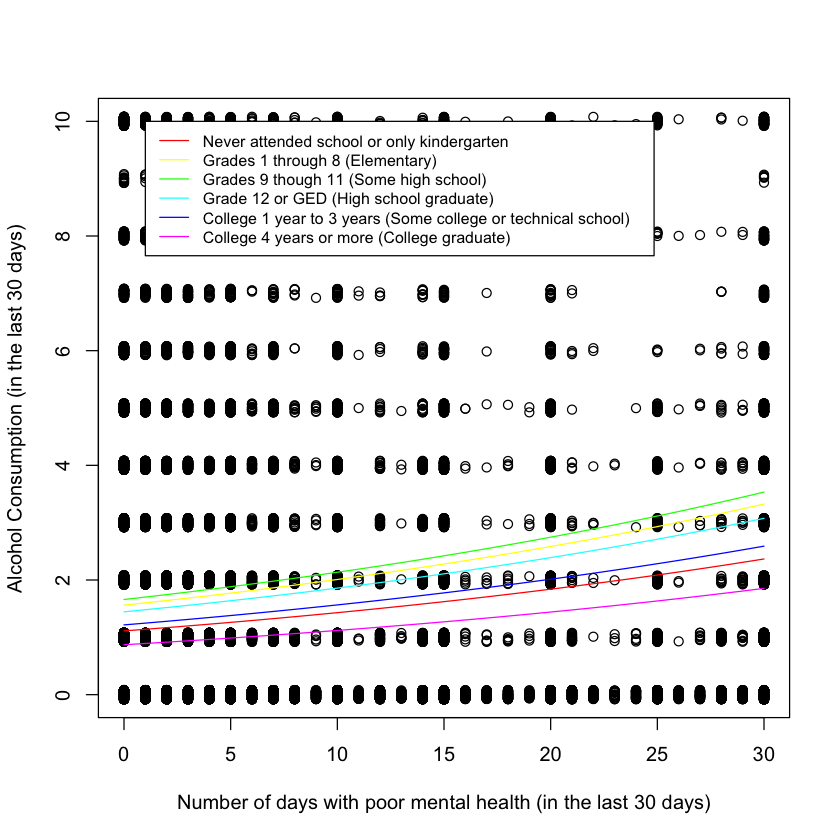

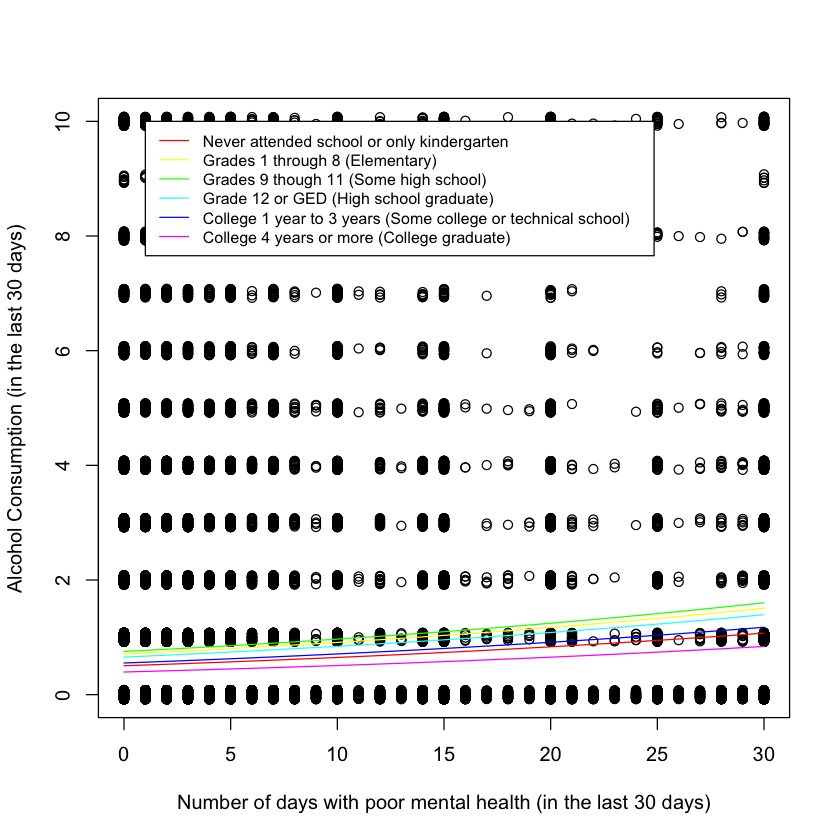

In [289]:
# marital = 'Married'
for (i in 1:2) { 
    plot(jitter(drnk3ge5, f = 0.4) ~ menthlth, data = mydata, pch = 1, xlab = 'Number of days with poor mental health (in the last 30 days)', ylab = 'Alcohol Consumption (in the last 30 days)', ylim = c(0, 10))
    data.pois.ma.sex <- subset(new.data.p, new.data.p$marital == 'Married' & new.data.p$sex == sex.p[i])
    for (k in 1:6) {
        data.pois.ma.sex.edu <- subset(data.pois.ma.sex, data.pois.ma.sex$educa == educa.p[k])
        lines(data.pois.ma.sex.edu$ynew.pois ~ data.pois.ma.sex.edu$menthlth, col = rainbow(6)[k]) 
        }
    legend(x = 1, y = 10, col = rainbow(6), lty = 1, cex = 0.8, bg = 'white',
           legend = c('Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)', 'Grades 9 though 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)', 'College 4 years or more (College graduate)'))
}

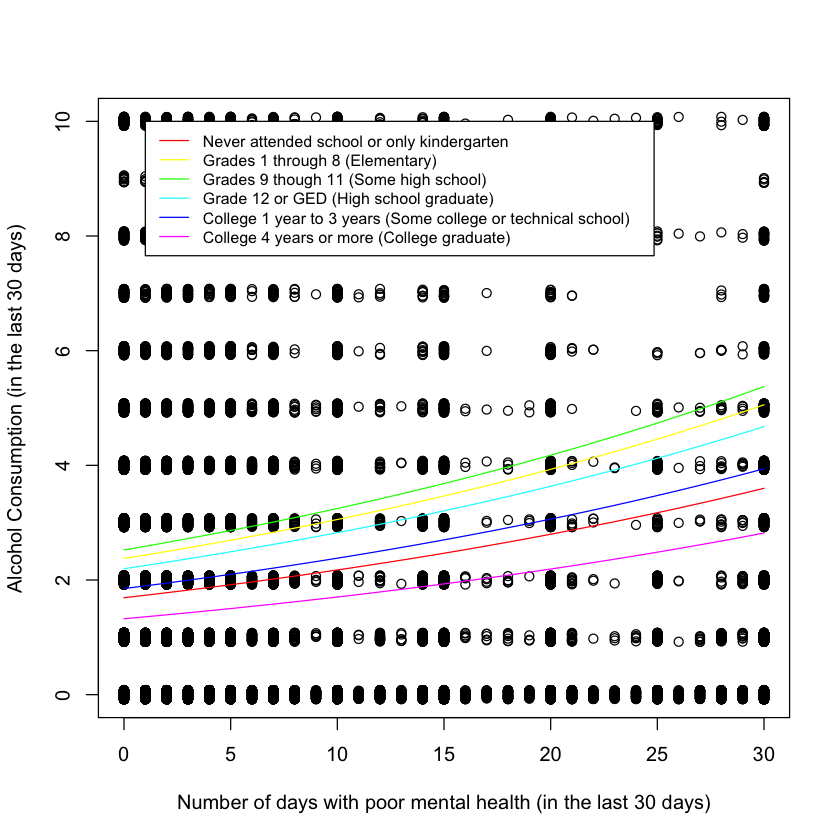

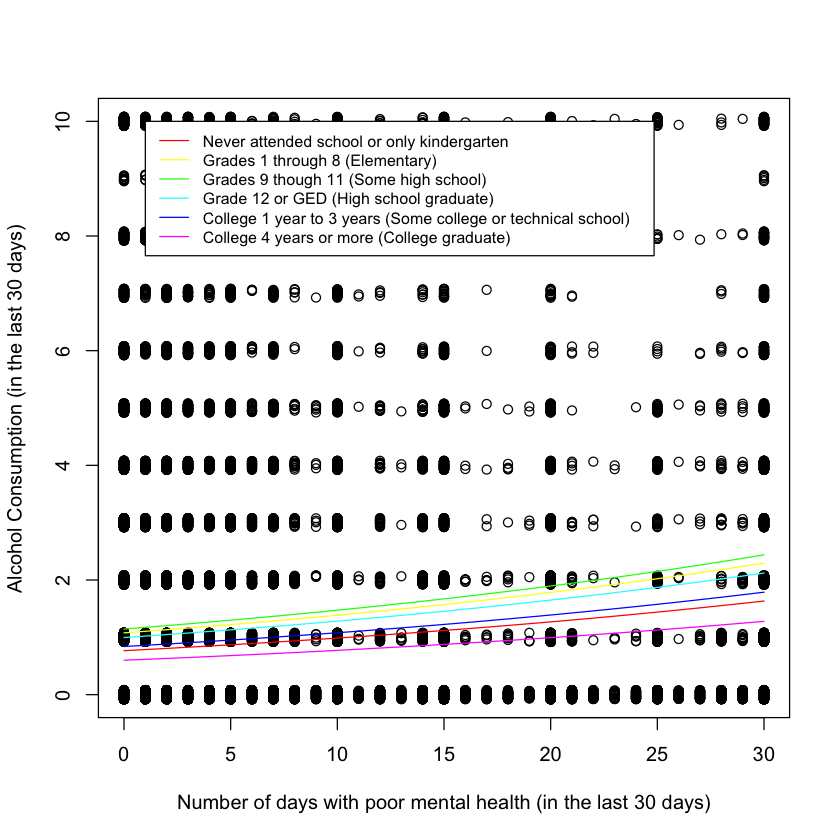

In [290]:
# marital = 'Divorced'
for (i in 1:2) { 
    plot(jitter(drnk3ge5, f = 0.4) ~ menthlth, data = mydata, pch = 1, xlab = 'Number of days with poor mental health (in the last 30 days)', ylab = 'Alcohol Consumption (in the last 30 days)', ylim = c(0, 10))
    data.pois.ma.sex <- subset(new.data.pois, new.data.pois$marital == 'Divorced' & new.data.pois$sex == sex.p[i])
    for (k in 1:6) {
        data.pois.ma.sex.edu <- subset(data.pois.ma.sex, data.pois.ma.sex$educa == educa.p[k])
        lines(data.pois.ma.sex.edu$ynew.pois ~ data.pois.ma.sex.edu$menthlth, col = rainbow(6)[k]) 
        }
    legend(x = 1, y = 10, col = rainbow(6), lty = 1, cex = 0.8, bg = 'white',
           legend = c('Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)', 'Grades 9 though 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)', 'College 4 years or more (College graduate)'))
}

### Main results of the model

All of the predictor variables are statistically significant (p-value < 0.05), except for "educaCollege 1 year to 3 years (Some college or technical school)" which has a p-value > 0.05.. The AIC is 485061. However, the coefficient values of the variables are small, which indicates that there is not a big impact of those explanatory variables on the response variable.

---
## Concerns about the explanatory variables being related to each other

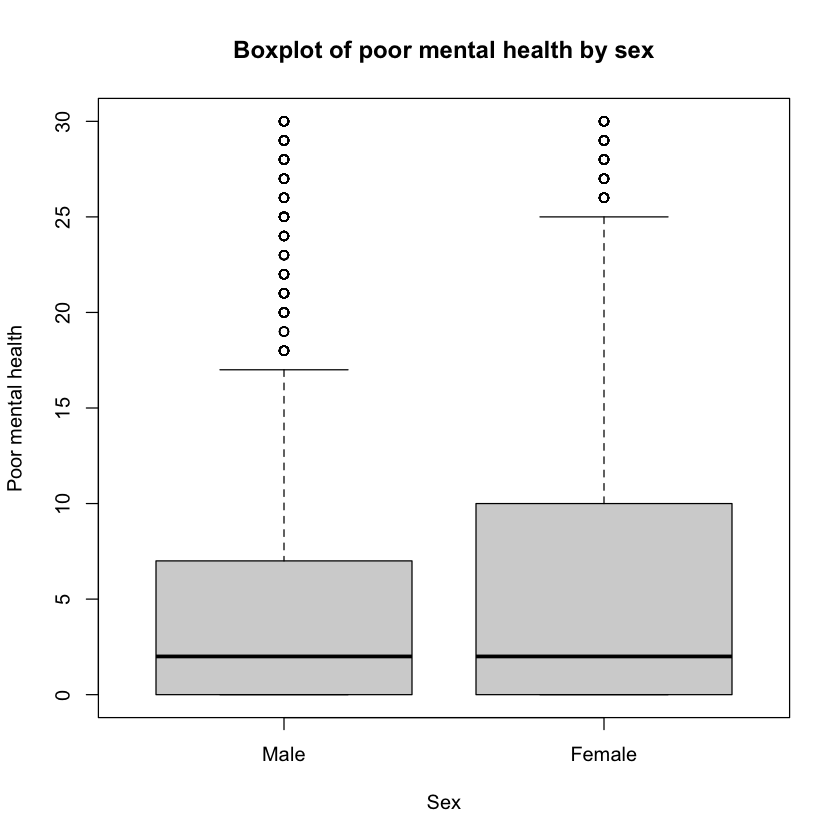

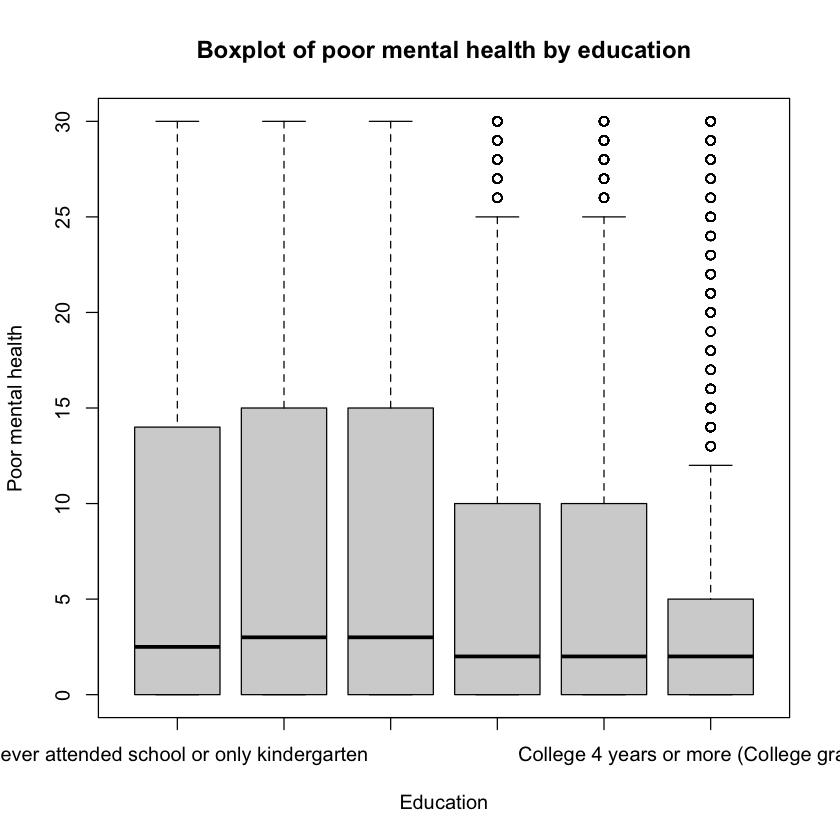

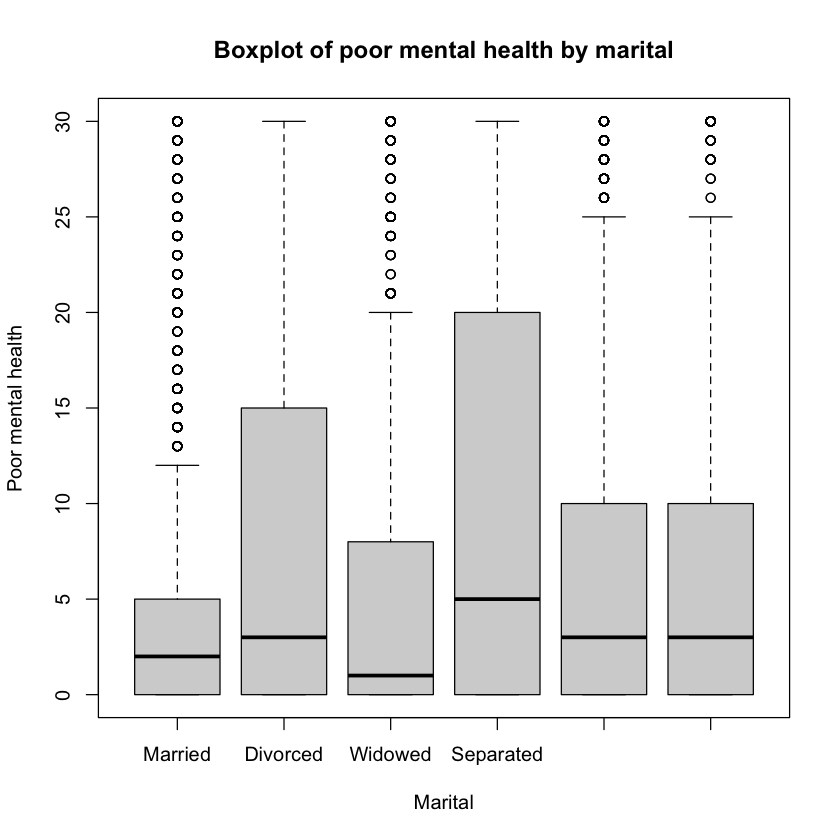

In [268]:
boxplot(menthlth ~ sex, data = mydata, xlab = "Sex", ylab = "Poor mental health",
        main = "Boxplot of poor mental health by sex")
boxplot(menthlth ~ educa, data = mydata, xlab = "Education", ylab = "Poor mental health",
        main = "Boxplot of poor mental health by education")
boxplot(menthlth ~ marital, data = mydata, xlab = "Marital", ylab = "Poor mental health",
        main = "Boxplot of poor mental health by marital")

The box plots show that there is no clear correlation between poor mental health and the variables of sex, education, and marital status. The means of poor mental health do not appear to vary significantly across the different groups for each variable, indicating that there is no strong relationship between these variables and poor mental health.

<div class="alert alert-block alert-success">
<a id="Discussion"></a>

# Discussion 
    
- How well do the models achieve the goal of the analysis?   
- What are the strengths and limitations of the models? 
- What are some recommendations to address the limitations of the final models?  
    
<div>


The models we developed, a logistic regression model and a Poisson regression model, both have significant variables and achieve the goal of capturing some relationship between the predictor variables and the response variable. The low AIC values suggest that these models are the best fits among all the other models we tested.

The logistic regression model can be used to predict binary outcomes, making it particularly useful in health research where the outcome of interest may be the presence or absence of a particular disease or condition. Meanwhile, the Poisson regression model is useful for modeling count data, which is common in health research as well. Therefore, the strengths of the models lie in their versatility and ability to handle different types of data.

However, the Poisson regression model is overdispersed, meaning that there may be some unexplained variation in the data that the model is not capturing. This suggests that the model may not be the best fit for the data. Additionally, both models assume a linear relationship between the predictor variables and the response variable, which may not be the case in reality.

To address the issue of overdispersion in the Poisson regression model, we could consider using a negative binomial regression model instead. This model allows for overdispersion and may provide a better fit to the data. Other models that could address overdispersion include quasi-Poisson regression and generalized Poisson regression.

To address the issue of the assumption of linearity, we could consider using polynomial terms or splines to allow for non-linear relationships between the predictor variables and the response variable. We could also consider using interaction terms to capture any possible interactions between the predictor variables.

In conclusion, our models have strengths in their versatility and ability to handle different types of data. However, they also have limitations, such as the overdispersion in the Poisson regression model and the assumption of linearity in both models. To address these limitations, we could consider using alternative models or techniques, such as negative binomial regression, quasi-Poisson regression, generalized Poisson regression, polynomial terms, splines, or interaction terms. By addressing these limitations, we can improve the accuracy of our models and enhance the overall quality of our analysis.

*Reference: Weinberg, S. L., & Abramowitz, S. K. (2018). Data analysis for the behavioral sciences using R. Guilford Publications.*

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# Building the Logistic Regression Model (1 mark)
</div>

In [ ]:
# Logistics
z1 <- glm(alcday5 ~ physhlth, data=mydata, family="binomial"(link="logit"))
z2 <- glm(alcday5 ~ menthlth, data=mydata, family="binomial"(link="logit"))
z3 <- glm(alcday5 ~ poorhlth, data=mydata, family="binomial"(link="logit"))
z4 <- glm(alcday5 ~ sleptim1, data=mydata, family="binomial"(link="logit"))
z5 <- glm(alcday5 ~ marital, data=mydata, family="binomial"(link="logit"))
z6 <- glm(alcday5 ~ educa, data=mydata, family="binomial"(link="logit"))
z7 <- glm(alcday5 ~ income2, data=mydata, family="binomial"(link="logit"))
z8 <- glm(alcday5 ~ sex, data=mydata, family="binomial"(link="logit"))
z9 <- glm(alcday5 ~ physhlth + menthlth + poorhlth + sleptim1, data=mydata, family="binomial"(link="logit"))
z10 <- glm(alcday5 ~ physhlth + menthlth + poorhlth + educa, data=mydata, family="binomial"(link="logit"))
z11 <- glm(alcday5 ~ poorhlth + menthlth +  educa + marital, data=mydata, family="binomial"(link="logit"))
z12 <- glm(alcday5 ~ income2 + menthlth +  educa + marital, data=mydata, family="binomial"(link="logit"))
z13 <- glm(alcday5 ~ income2 + sex + educa + physhlth, data=mydata, family="binomial"(link="logit"))
z14 <- glm(alcday5 ~ income2 + menthlth +  sleptim1 + physhlth, data=mydata, family="binomial"(link="logit"))
z15 <- glm(alcday5 ~ income2 + poorhlth +  educa + physhlth, data=mydata, family="binomial"(link="logit"))
z16 <- glm(alcday5 ~ educa + menthlth +  sleptim1 + physhlth, data=mydata, family="binomial"(link="logit"))

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = alcday5 ~ physhlth, family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
2.409e-06  2.409e-06  2.409e-06  2.409e-06  2.409e-06  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) 2.657e+01  1.346e+03    0.02    0.984
physhlth    4.710e-09  1.235e+02    0.00    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 99808  degrees of freedom
Residual deviance: 5.7905e-07  on 99807  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


### Compare the AIC values for the models that you tried.

In [ ]:
summary(z1)

In [ ]:
summary(z2)

In [ ]:
summary(z3)

In [ ]:
summary(z4)

In [ ]:
summary(z5)

In [ ]:
summary(z6)

In [ ]:
summary(z7)

In [ ]:
summary(z8)

In [ ]:
summary(z9)

In [ ]:
summary(z10)

In [ ]:
summary(z11)

In [ ]:
summary(z12)

In [ ]:
summary(z13)

In [ ]:
summary(z14)

Model z13 provides the lowest AIC values among all the models.  

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# Building the Poisson Regression Model (1 mark)
</div>

In [272]:
poiss.1 <- glm(drnk3ge5 ~ marital, data = mydata.pois, family = "poisson"(link = "log"))
poiss.2 <- glm(drnk3ge5 ~ marital + educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.3 <- glm(drnk3ge5 ~ marital * educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.4 <- glm(drnk3ge5 ~ marital + income2, data = mydata.pois, family = "poisson"(link = "log"))
poiss.5 <- glm(drnk3ge5 ~ marital * income2, data = mydata.pois, family = "poisson"(link = "log"))
poiss.6 <- glm(drnk3ge5 ~ marital + sex, data = mydata.pois, family = "poisson"(link = "log"))
poiss.7 <- glm(drnk3ge5 ~ marital * sex, data = mydata.pois, family = "poisson"(link = "log"))
poiss.8 <- glm(drnk3ge5 ~ marital + educa + income2, data = mydata.pois, family = "poisson"(link = "log"))
poiss.9 <- glm(drnk3ge5 ~ marital + sex + educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.10 <- glm(drnk3ge5 ~ marital + sex + income2, data = mydata.pois, family = "poisson"(link = "log"))
poiss.11 <- glm(drnk3ge5 ~ marital + sex + educa + income2, data = mydata.pois, family = "poisson"(link = "log"))
poiss.12 <- glm(drnk3ge5 ~ educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.13 <- glm(drnk3ge5 ~ income2 + educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.14 <- glm(drnk3ge5 ~ income2 * educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.15 <- glm(drnk3ge5 ~ sex + educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.16 <- glm(drnk3ge5 ~ sex * educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.17 <- glm(drnk3ge5 ~ income2 + sex + educa, data = mydata.pois, family = "poisson"(link = "log"))
poiss.18 <- glm(drnk3ge5 ~ income2, data = mydata.pois, family = "poisson"(link = "log"))
poiss.19 <- glm(drnk3ge5 ~ income2 + sex, data = mydata.pois, family = "poisson"(link = "log"))
poiss.20 <- glm(drnk3ge5 ~ income2 * sex, data = mydata.pois, family = "poisson"(link = "log"))
poiss.21 <- glm(drnk3ge5 ~ income2 + sex + marital + menthlth, data = mydata.pois, family = "poisson"(link = "log"))
poiss.22 <- glm(drnk3ge5 ~ educa + sex + marital + menthlth, data = mydata.pois, family = "poisson"(link = "log"))

### Compare the AIC values for the models that you tried.

In [ ]:
summary(poiss.1)
summary(poiss.2)
summary(poiss.3)
summary(poiss.4)
summary(poiss.5)
summary(poiss.6)
summary(poiss.7)
summary(poiss.8)
summary(poiss.9)
summary(poiss.10)
summary(poiss.11)
summary(poiss.12)
summary(poiss.13)
summary(poiss.14)
summary(poiss.15)
summary(poiss.16)
summary(poiss.17)
summary(poiss.18)
summary(poiss.19)
summary(poiss.20)
summary(poiss.21)
summary(poiss.22)

Model poiss.22 provides the lowest AIC values among all the models.  